# Analisis de supervivencia 

Este cuaderno cuenta con un análisis rudimentario de la supervivencia de 5 años y está subdivido de la siguiente manera:

1. Importación de las librerías necesarias para el análisis
2. Inspección de la data
3. Limpieza general de data (Valores nulos)
3. Análisis Explorativo
4. Histogramas de interés
5. Análisis multivarial (correlacional)
6. Pruebas estadísticas
7. Discusiones

El proposito de este cuaderno es de proveer un análisis estadístico de la data colectada por las doctoras Ninoska y Valeria Alvarenga. 

## 1. Importación de librerías pertinentes

In [1]:
# Importing all libraries used during the analysis:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from lifelines import KaplanMeierFitter

## 2. Inspección de la data:

In [2]:
# setting the path:
path = r"C:\Repositories\Survivor_Analysis\data\data.xlsx"

# reading the data:
data = pd.read_excel(path, engine='openpyxl', sheet_name="MATRIZ")

In [3]:
# Inspect the data:
data.head(10)

,Timestamp,Año del Caso,Escolaridad,Estado Civil,Edad,Departamento de procedencia,Factores de Riesgo,Tipo Histológico,Her2,Receptor Progesterona,...,Tumor Primario,Linfonodos,Metástasis,Sitio de Metástasis,Estapa del Cáncer al ingreso,Procedimiento Quirurgico,Radioterapia,Quimioterapia,Homonoterpia,Sobrevida a los 60 meses (5 años)
0,2023-01-23 13:19:36.979,2012,Secundaia Completa,Soltera,igual o mayor de 66 años,Santa Bárbara,"Nuliparidad, Mayor de 40",Carcinoma Ductal Invasor,Positivo,Negativo,...,4,1,0,NaN,IIIB,Mastectomia Total,Adyuvante,Si,No,Si
1,2023-01-23 15:24:10.753,2012,Secundaia Completa,Soltera,46-55 años,Francisco Morazán,"Mayor de 40, Menarquia antes de los 12 años, ACOs",Carcinoma Ductal In situ,Negativo,Positivo,...,Sin datos,Sin Datos,Sin datos,Hueso( húmero izquierdo e isquion derecho),IV,Mastectomia Total,Adyuvante,Si,Si,Si
2,2023-01-26 11:15:50.251,2012,NaN,Casada,56-65 años,Valle,Mayor de 40,Carcinoma Ductal Invasor,Negativo,Negativo,...,3,1,0,NaN,IIIA,Mastectomia Total,No,Si,No,Si
3,2023-01-26 13:42:23.474,2012,NaN,Soltera,igual o mayor de 66 años,Choluteca,Mayor de 40,Carcinoma Ductal Invasor,Positivo,Negativo,...,Sin datos,Sin Datos,Sin datos,NaN,IV,Mastectomia Total,No,Si,No,Si
4,2023-01-26 13:46:48.577,2012,Univeridad,Soltera,36-45 años,Comayagua,"Mayor de 40, DIU",Carcinoma Ductal Invasor,Negativo,Positivo,...,Sin datos,Sin Datos,Sin datos,NaN,IV,Mastectomia Total,Adyuvante,No,No,Si
5,2023-01-26 13:47:48.991,2012,Secundaia Completa,Casada,36-45 años,Francisco Morazán,"Antecedentes Familiares, Mayor de 40, ACOs",Carcinoma Ductal Invasor,Negativo,Negativo,...,2,2,0,NaN,IIIA,Mastectomia parcial,Adyuvante,Si,No,Si
6,2023-01-26 14:06:35.569,2012,NaN,Soltera,igual o mayor de 66 años,Colón,Ninguno,Carcinoma Ductal Invasor,Negativo,Positivo,...,3,0,0,NaN,IIB,Mastectomia Total,No,Si,Si,Si
7,2023-01-31 11:18:21.990,2012,NaN,Unión Consensual,56-65 años,Francisco Morazán,Mayor de 40,Mixto,Positivo,Positivo,...,Sin datos,Sin Datos,Sin datos,NaN,IV,no,No,Si,No,No
8,2023-01-31 12:00:30.081,2012,NaN,Soltera,46-55 años,Lempira,Mayor de 40,Carcinoma Ductal Invasor,Positivo,Negativo,...,4,2,0,NaN,IIIB,Mastectomia Total,Adyuvante,Si,No,No
9,2023-01-31 12:06:09.012,2012,NaN,Soltera,36-45 años,Atlántida,Mayor de 40,Carcinoma Ductal Invasor,Negativo,Negativo,...,3,1,0,NaN,IIB,no,Adyuvante,Si,No,No


In [4]:
# Creating a copy of the data:
df = data.copy()
df.columns

Index(['Timestamp', 'Año del Caso', 'Escolaridad', 'Estado Civil', 'Edad',
       'Departamento de procedencia', 'Factores de Riesgo', 'Tipo Histológico',
       'Her2', 'Receptor Progesterona', 'Estrogeno Recepetor',
       'Tumor Primario', 'Linfonodos', 'Metástasis', 'Sitio de Metástasis',
       'Estapa del Cáncer al ingreso', 'Procedimiento Quirurgico',
       'Radioterapia', 'Quimioterapia', 'Homonoterpia',
       'Sobrevida a los 60 meses (5 años)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Timestamp                          662 non-null    datetime64[ns]
 1   Año del Caso                       662 non-null    int64         
 2   Escolaridad                        390 non-null    object        
 3   Estado Civil                       662 non-null    object        
 4   Edad                               662 non-null    object        
 5   Departamento de procedencia        662 non-null    object        
 6   Factores de Riesgo                 662 non-null    object        
 7   Tipo Histológico                   662 non-null    object        
 8   Her2                               662 non-null    object        
 9   Receptor Progesterona              662 non-null    object        
 10  Estrogeno Recepetor                662

## 3. Limpieza General de la data:

In [6]:
# Handling Spanish Null:
df.replace("Sin Datos", pd.NA, inplace=True)
# Inspecting the data after the nulls have been standardized:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Timestamp                          662 non-null    datetime64[ns]
 1   Año del Caso                       662 non-null    int64         
 2   Escolaridad                        390 non-null    object        
 3   Estado Civil                       662 non-null    object        
 4   Edad                               662 non-null    object        
 5   Departamento de procedencia        662 non-null    object        
 6   Factores de Riesgo                 662 non-null    object        
 7   Tipo Histológico                   662 non-null    object        
 8   Her2                               662 non-null    object        
 9   Receptor Progesterona              662 non-null    object        
 10  Estrogeno Recepetor                662

A primera vista, hay 662 filas y unas 21 columnas, de las cuales la mayoría están basadas en texto. Tendremos que inspeccionar cada campo para verificar que no hayan typos u otro tipo de errores que puedan afectar el análisis.

In [7]:
# Checking null values:
df.isnull().sum()

Timestamp                              0
Año del Caso                           0
Escolaridad                          272
Estado Civil                           0
Edad                                   0
Departamento de procedencia            0
Factores de Riesgo                     0
Tipo Histológico                       0
Her2                                   0
Receptor Progesterona                  0
Estrogeno Recepetor                    0
Tumor Primario                         0
Linfonodos                            75
Metástasis                             0
Sitio de Metástasis                  593
Estapa del Cáncer al ingreso           0
Procedimiento Quirurgico               4
Radioterapia                           0
Quimioterapia                          0
Homonoterpia                           1
Sobrevida a los 60 meses (5 años)      0
dtype: int64

In [8]:
df.Escolaridad.value_counts()

Secundaia Completa       184
Univeridad               157
Primaria incompleta       11
Universidad completa      11
Secundaria Incompleta     10
Secundaria completa       10
Analfabeta                 2
Univeridad IncomplEta      2
Secundaria incompleta      2
Primaria Incompleta        1
Name: Escolaridad, dtype: int64

Como podemos ver en la celda de arriba, hay algunas correciones que tenemos que hacer:

In [9]:
# defining values to replace:
escolaridad_replacement_dict = {
    "Secundaia Completa": "Secundaria Completa",
    "Primaria incompleta": "Primaria Incompleta",
    "Secundaria completa": "Secundaria Completa",
    "Secundaria incompleta":"Secundaria Incompleta",
    "Univeridad IncomplEta": "Universidad Incompleta",
    "Univeridad": "Universidad",
    "Universidad completa":"Universidad"
}

df['Escolaridad'].replace(escolaridad_replacement_dict, inplace=True)

#sanity check:
df.Escolaridad.value_counts()

Secundaria Completa       194
Universidad               168
Secundaria Incompleta      12
Primaria Incompleta        12
Analfabeta                  2
Universidad Incompleta      2
Name: Escolaridad, dtype: int64

#### Estado Civil:

In [10]:
df["Estado Civil"].value_counts()

Soltera             281
Casada              281
Unión Consensual     62
Viuda                34
Unión consensual      3
Divorciada            1
Name: Estado Civil, dtype: int64

In [11]:
df["Estado Civil"].replace("Unión consensual", "Unión Consensual", inplace=True)
df["Estado Civil"].value_counts()

Soltera             281
Casada              281
Unión Consensual     65
Viuda                34
Divorciada            1
Name: Estado Civil, dtype: int64

#### Edad

In [12]:
df['Edad'].value_counts()

46-55 años                  198
56-65 años                  173
36-45 años                  124
igual o mayor de 66 años    115
26-35 años                   49
19-25 años                    3
Name: Edad, dtype: int64

If we do proceed with modelling, then we'll have to OHE this for it to have any meaning? That or supplant the categories for an integer/float.

#### Departamentos

In [13]:
df["Departamento de procedencia"].value_counts()

Francisco Morazán    366
Comayagua             58
Choluteca             50
Olancho               45
El Paraíso            33
Valle                 24
Cortés                13
Santa Bárbara         12
Atlántida             12
Yoro                  11
Copán                  9
Lempira                7
La Paz                 7
Colón                  5
Ocotepeque             3
Islas de la Bahía      3
Intibucá               3
Gracias a Dios         1
Name: Departamento de procedencia, dtype: int64

All looks good for this one.

#### Factores de Riesgo:

In [14]:
df["Factores de Riesgo"].value_counts()

Mayor de 40                                          154
Mayor de 40, ACOs                                     79
Antecedentes Familiares, Mayor de 40                  27
Mayor de 40, Menarquia antes de los 12 años           25
Nuliparidad, Mayor de 40                              21
                                                    ... 
Nuliparidad, ACOs                                      1
Primer gesta despues de los 30, Mayor de 40, ACOs      1
ACOs, DIU                                              1
Mayor de 40, ACOs, DIU                                 1
Primera gesta después de los 30, Mayor de 40           1
Name: Factores de Riesgo, Length: 122, dtype: int64

Estos son valores separados por comas, tendremos que crear n columnas para cada factor de riesgo ya que no tienen un peso específico.
También podrían ser codificados/vectorizados y guardados en un arreglo de np -- lo revisaremos más adelante.


In [15]:
unique_fr = df["Factores de Riesgo"].unique().tolist()
print(f"The number of unique risk factors are: {len(unique_fr)}")

The number of unique risk factors are: 122


In [16]:
# Counting the number of risk factors each patient has (This will be moved to the Feature Engineering section later).

df["Número de Factores de Riesgo"] = df["Factores de Riesgo"].str.count(", ") + 1 
df["Número de Factores de Riesgo"].value_counts()

# Split the strings in 'Factores de Riesgo' on the comma and strip whitespace
df['Factores de Riesgo'] = df['Factores de Riesgo'].str.split(',').apply(lambda x: [item.strip() for item in x])

# Explode the lists to get each risk factor as a separate row
df_exploded = df.explode('Factores de Riesgo')


# Risk Factor Mapping:

risk_factor_map = {
    'inyección':'Inyección',
    'Inyeción':'Inyección',
    'Inyección mensul':'Inyección',
    'Inyección 10 años':'Inyección',
    'DIU 5 años': 'DIU',
    'DIU 3 años': 'DIU',
    'DIU 8 años': 'DIU',
    'DIU  15 años': 'DIU',
    'ACOS 3 años': 'ACOs',
    'Implanon':'Implante',
    'IMPLANTE':'Implante',
    'implante':'Implante',
    'Primer gesta despues de los 30': 'Primera gesta después de los 30',
    'Menopausia despues de lo 52 años':'Menopausia después de los 52 años',
    'Inyección por 6 años  y DIU por 2 meses':'Combinación de MAC',
    'Antecedentes familiares':'Antecedentes Familiares',
    '':'Ninguno'

}

df_exploded['Factores de Riesgo'] = df_exploded['Factores de Riesgo'].replace(risk_factor_map)

risk_factor_counts = df_exploded['Factores de Riesgo'].value_counts()


print(risk_factor_counts)

Mayor de 40                          564
ACOs                                 209
Antecedentes Familiares              152
Menarquia antes de los 12 años       105
DIU                                   95
Primera gesta después de los 30       59
Menopausia después de los 52 años     53
Nuliparidad                           50
Inyección                             37
Ninguno                               15
Depoprovera                            6
Implante                               4
Combinación de MAC                     1
Name: Factores de Riesgo, dtype: int64


<AxesSubplot: >

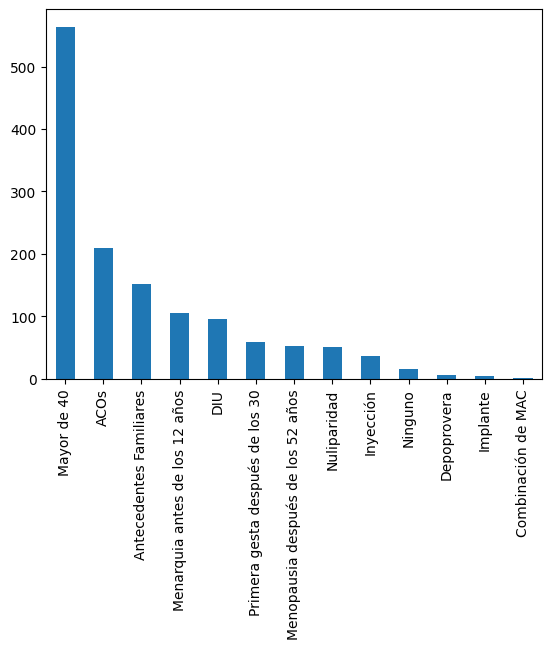

In [17]:
df_exploded['Factores de Riesgo'].value_counts().plot(kind='bar')

In [18]:
# Dealing with Spanish "Nulls":
df["Factores de Riesgo"].replace("Ninguno", pd.NA, inplace=True)


In [19]:
df["Factores de Riesgo"].isnull().sum() # Sanity check

0

#### Tipo Histológico:

In [20]:
df["Tipo Histológico"].value_counts()

Carcinoma Ductal Invasor                                                                475
Carcinoma Lobulillar Incasor                                                             63
Mixto                                                                                    58
Carcinoma Ductal In situ                                                                 14
Medular                                                                                   7
Papilar                                                                                   6
Carcinoma Lobulillar Invasor                                                              5
Carcinoma Lobulillar In situ                                                              4
Coloide                                                                                   2
Carcinoma apocrino                                                                        2
Metaplasico: escamoso, papilar, mucinoso                                        

In [21]:
# There is an additional one that is giving issue: Metaplasico may have a trailing white space.
histological_replacement = {
    "Carcinoma Lobulillar Incasor":"Carcinoma Lobulillar Invasor",
    "Carcinoma coloide":"Carcinoma Coloide",
}

# Dealing with leading and trailing whitespaces:
df["Tipo Histológico"] = df["Tipo Histológico"].str.strip()

# Applying the replacements for the typos:
df["Tipo Histológico"].replace(histological_replacement, inplace=True)


Hay varios tipos histologicos, pero la mayoría ocurren en los primeros 5 tipos más frecuentes. Para poder graficar, tendremos que limitar la data a solo esos tipos histológicos que han ocurrido más de 1 vez.

#### Her2

In [22]:
df["Her2"].value_counts()

Negativo    492
Positivo    170
Name: Her2, dtype: int64

#### Receptor Progesterona

In [23]:
df["Receptor Progesterona"].value_counts()

Negativo     345
Positivo     311
Sin datos      6
Name: Receptor Progesterona, dtype: int64

Drop sin datos.

In [24]:
# Setting "Sin datos" as Null:
df["Receptor Progesterona"].replace("Sin datos", pd.NA, inplace=True)
df["Receptor Progesterona"].dropna(inplace=True)
df["Receptor Progesterona"].value_counts()

Negativo    345
Positivo    311
Name: Receptor Progesterona, dtype: int64

#### Estrogeno Receptor

In [25]:
df["Estrogeno Recepetor"].value_counts()

Negativo     279
Luminal A    246
Luminal B    137
Name: Estrogeno Recepetor, dtype: int64

Dado el número de categorías, este podría ser otra opción para el One-Hot Encoding.

#### Tumor Primario

In [26]:
df["Tumor Primario"].value_counts()

2            310
1            159
Sin datos     81
3             78
4             33
0              1
Name: Tumor Primario, dtype: int64

In [27]:
# dealing with the null:
df["Tumor Primario"].replace("Sin datos", pd.NA, inplace=True)
df["Tumor Primario"].value_counts(dropna=False)

2       310
1       159
<NA>     81
3        78
4        33
0         1
Name: Tumor Primario, dtype: int64

#### Linfonodos

In [28]:
df["Metástasis"].value_counts() # if IV: 1, else: 0

0            548
1             77
Sin datos     37
Name: Metástasis, dtype: int64

In [29]:
df["Metástasis"].replace("Sin datos", pd.NA, inplace=True)

In [30]:
df["Metástasis"].value_counts(dropna=False)

0       548
1        77
<NA>     37
Name: Metástasis, dtype: int64

#### Sitio de Metástasis

Hay una cantidad considerable de valores nulos en esta columna, hay que considerar no utilizarla por falta de información a la hora de hacer una regresión. 

In [31]:
print(df["Sitio de Metástasis"].value_counts().sum())
df["Sitio de Metástasis"].value_counts(dropna=True)

69


Cerebro                                                  7
Pulmón                                                   5
Óseo                                                     4
Pulmón                                                   3
Hígado                                                   3
Adenopatías axilares                                     2
Ósea                                                     2
Cerebral                                                 2
Piel                                                     2
Óseo                                                     2
Óseas,  pulmonar,  mediastino                            1
Columna dorsolumbar                                      1
Cerebral y a columna                                     1
Columna                                                  1
Oseo                                                     1
Región supraclavicular                                   1
Adenomegalias supraclaviculares, piel                   

In [32]:
# Same as with the Risk Factors: This will also be moved to the feature engineering section.
df["Número de sitios de Metástasis"] = df["Sitio de Metástasis"].str.count(", | y ") + 1
df["Número de sitios de Metástasis"].value_counts()

1.0    45
2.0    14
3.0     8
4.0     2
Name: Número de sitios de Metástasis, dtype: int64

Me parece que hay una discrepancia entre los sitios de metástasis, la variable binaria de si hay metástasis o no: `df['Metastasis]`, y los valores nulos:

In [33]:
num_loc_met = df["Número de sitios de Metástasis"].value_counts().sum() # 69
num_loc_met_null = df["Número de sitios de Metástasis"].isnull().sum() # 593
num_met_pos = df[df["Metástasis"] == 1].shape[0] # 77

print(f"Number of patients with metastasis: {num_met_pos}")
print(f"Number of patients with metastasis and no location: {num_loc_met_null}")
print(f"Number of patients with metastasis and location: {num_loc_met}")

Number of patients with metastasis: 77
Number of patients with metastasis and no location: 593
Number of patients with metastasis and location: 69


Esto implica que deberían de haber 8 valores nulos en los sitios de metástasis, pero en la base de datos hay unas 11. Al inspeccionar la base de datos, vemos otras discrepancias como la de abajo, donde el campo de Metástasis se marca como 0, pero en el sitio de Metástasis hay un valor "Oseo".

In [34]:
df.loc[(df["Metástasis"] == 0) & (df["Sitio de Metástasis"].notnull()) & (df["Sitio de Metástasis"] != 0)]


,Timestamp,Año del Caso,Escolaridad,Estado Civil,Edad,Departamento de procedencia,Factores de Riesgo,Tipo Histológico,Her2,Receptor Progesterona,...,Metástasis,Sitio de Metástasis,Estapa del Cáncer al ingreso,Procedimiento Quirurgico,Radioterapia,Quimioterapia,Homonoterpia,Sobrevida a los 60 meses (5 años),Número de Factores de Riesgo,Número de sitios de Metástasis
190,2023-02-10 16:05:47.819,2017,Secundaria Completa,Casada,46-55 años,El Paraíso,[Mayor de 40],Carcinoma Ductal Invasor,Negativo,Negativo,...,0,Óseo,IV,Mastectomia parcial,Paleativa,Si,No,No,1,1.0


#### Etapa del Cáncer al ingreso

In [35]:
df.rename(columns={'Estapa del Cáncer al ingreso': "Etapa del Cáncer al ingreso"}, inplace=True)
df["Etapa del Cáncer al ingreso"].value_counts()

IIA     152
IIIA    135
IIB     112
IA       86
IV       80
IIIC     55
IIIB     37
IB        5
Name: Etapa del Cáncer al ingreso, dtype: int64

Estas se podrían categorizar utilizando ya sea un float o Integer para poder ver la correlación con la taza de supervivencia, pero por los momentos quedará así.

#### Procedimiento Quirurgico

In [36]:
df["Procedimiento Quirurgico"].value_counts()

Mastectomia Total      323
Mastectomia parcial    204
no                      57
Excissión Local         40
Mastectomía total       23
Mastectomía parcial      9
Escisión local           2
Name: Procedimiento Quirurgico, dtype: int64

In [37]:
surgery_replacement = {
    "Mastectomia Total": "Mastectomía Total",
    "Mastectomía total": "Mastectomía Total",
    "Mastectomía parcial": "Mastectomía Parcial",
    "Mastectomia parcial": "Mastectomía Parcial",
    "Escisión local": "Excissión Local"
}

# Replacing typos:
df["Procedimiento Quirurgico"].replace(surgery_replacement, inplace=True)
df["Procedimiento Quirurgico"].value_counts()

Mastectomía Total      346
Mastectomía Parcial    213
no                      57
Excissión Local         42
Name: Procedimiento Quirurgico, dtype: int64

#### Radioterapia

In [38]:
df["Radioterapia"].value_counts()

Adyuvante       488
No               98
Paleativa        58
NeoAdyuvante     16
Concomitante      2
Name: Radioterapia, dtype: int64

#### Quimioterapia

In [39]:
df["Quimioterapia"].value_counts()

Si    502
No    136
Sí     24
Name: Quimioterapia, dtype: int64

In [40]:
# Replacing typo:
df["Quimioterapia"].replace("Si", "Sí", inplace=True)
df["Quimioterapia"].value_counts()

Sí    526
No    136
Name: Quimioterapia, dtype: int64

#### Hormonoterapia

In [41]:
# Correcting typo on column name:
df.rename(columns={'Homonoterpia': 'Hormonoterapia'}, inplace=True)

# value counts:
df["Hormonoterapia"].value_counts()


No    419
Si    228
Sí     14
Name: Hormonoterapia, dtype: int64

In [42]:
df["Hormonoterapia"].replace("Si", "Sí", inplace=True)
df["Hormonoterapia"].value_counts()


No    419
Sí    242
Name: Hormonoterapia, dtype: int64

#### Sobrevida a los 60 mesas (5 años)

In [43]:
df.rename(columns={'Sobrevida a los 60 meses (5 años)': '5y_survival'}, inplace=True)


In [44]:
df["5y_survival"].replace("Si", "Sí", inplace=True)
df["5y_survival"].value_counts()

No aplica    417
Sí           152
No            93
Name: 5y_survival, dtype: int64

In [45]:
# df_applies = df[df["5y_survival"] != "No aplica"]
# df_applies["5y_survival"].value_counts()

In [46]:
print("Number of Null Values")
print(df.isnull().sum())
print("")
print("*" * 80)
df.info()

Number of Null Values
Timestamp                           0
Año del Caso                        0
Escolaridad                       272
Estado Civil                        0
Edad                                0
Departamento de procedencia         0
Factores de Riesgo                  0
Tipo Histológico                    0
Her2                                0
Receptor Progesterona               6
Estrogeno Recepetor                 0
Tumor Primario                     81
Linfonodos                         75
Metástasis                         37
Sitio de Metástasis               593
Etapa del Cáncer al ingreso         0
Procedimiento Quirurgico            4
Radioterapia                        0
Quimioterapia                       0
Hormonoterapia                      1
5y_survival                         0
Número de Factores de Riesgo        0
Número de sitios de Metástasis    593
dtype: int64

********************************************************************************
<class 'p

In [47]:
df.to_excel(r"C:\Repositories\Survivor_Analysis\data\cleaned_data.xlsx", index=False)

### 3. Análisis explorativo

In [49]:
# Creating data filter option for analysis:
def filter_df(odf, bool):
    """
    This function filters the dataframe based on a boolean value.
    If bool = True, the dataframe will filter out the rows that have not reached the 5 year from diagnosis mark.

    Parameters:
    - df: pandas Dataframe
            The oringinal dataframe.
    
    - df_filtered: pandas Dataframe
            The dataframe that has been filtered.

    - bool: bool

    Returns:
    - df: pandas Dataframe
    """
    
    if bool:
       df = odf[odf['5y_survival'] != "No aplica"]
       print(f'The dimensions of the filtered dataframe df are {df.shape}')
    else:
        df = odf
        print(f'The dimensions of the unfiltered dataframe df are {df.shape}')
    return df

# Without filter:
df = filter_df(df, False)

# With filter:
df = filter_df(df, True)


The dimensions of the unfiltered dataframe df are (662, 23)
The dimensions of the filtered dataframe df are (245, 23)


### Análisis univariado

-características sociodemográficas
(Edad, escolaridad, estado civil, departamento de procedencia)

-Factores de riesgo

-Sitios de metástasis

-Receptores hormonales (HER 2, Progesterona, Estrógeno)

In [52]:
def univariate_analysis(data, feature_name, rotation=0, pie_percentage=True, figsize=(10, 6), label_truncate=20):
    """
    Perform univariate analysis on a given feature in the dataset.

    Parameters:
    - data: pandas DataFrame
        The dataset containing the feature to be analyzed.
    - feature_name: str
        The name of the feature to be analyzed.
    - rotation: int, optional
        The rotation angle of x-axis labels in the count plot (default is 0).
    - pie_percentage: bool, optional
        Whether to display the percentage in the pie chart (default is True).
    - figsize: tuple, optional
        The figure size of the plots (default is (10, 6)).
    - label_truncate: int, optional
        The maximum length of x-axis labels in the count plot before truncation (default is 20).

    Returns:
    - Plots of the distribution of the feature.
    """

    # Pie chart
    plt.figure(figsize=(10, 12))

    if pie_percentage:
        data[feature_name].value_counts().sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=45)
    else:
        data[feature_name].value_counts().sort_values().plot(kind='pie', startangle=45, )

    plt.title(f'Distribución de {feature_name}')
    plt.legend(loc="best")
    plt.show()

    # Count plot

    ax = data[feature_name].value_counts().plot(kind='bar', title=f"Distribución de {feature_name}", figsize=figsize, rot=rotation)

    # Get the current tick labels
    labels = [item.get_text() for item in ax.get_xticklabels()]

    # Truncate the labels to the first 20 characters and set them as the new labels
    ax.set_xticklabels([label[:10] + '...' if len(label) > label_truncate else label for label in labels])

    # Add the value count on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.show()

#### Escolaridad:

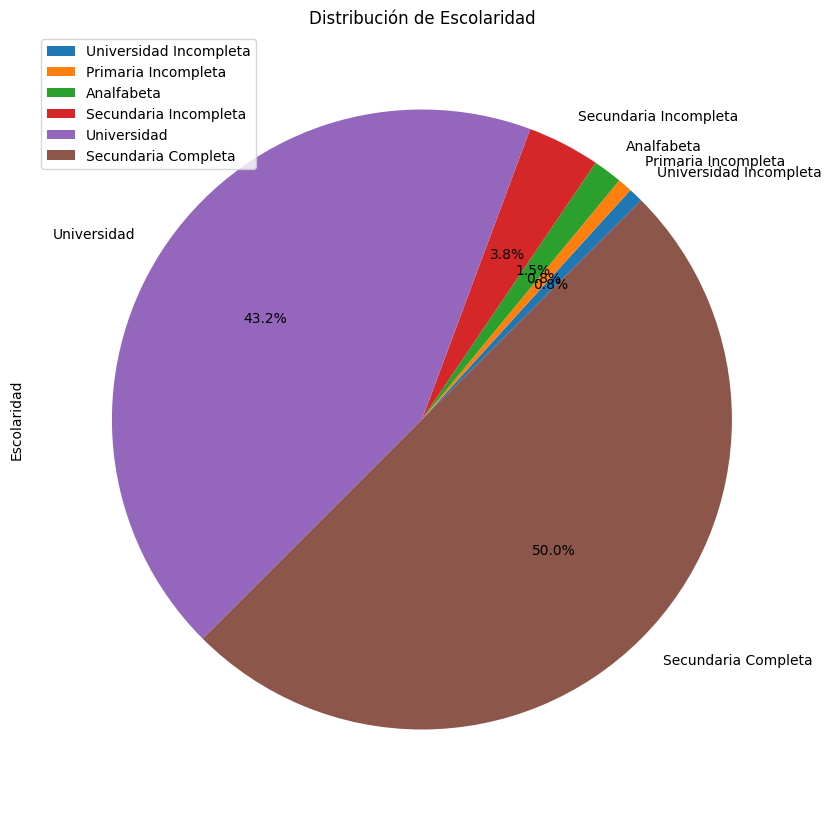

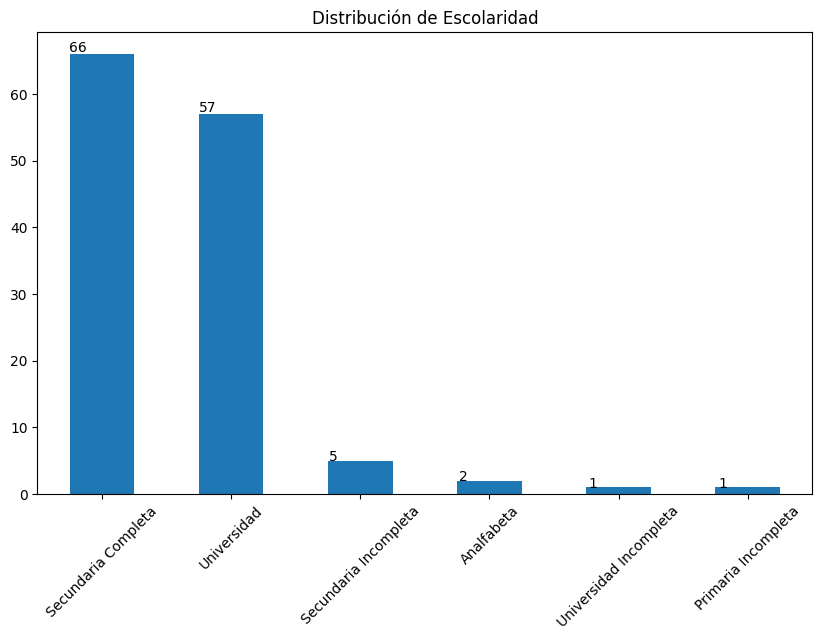

In [53]:
univariate_analysis(df, "Escolaridad", rotation=45, label_truncate=30)

#### Estado Civil:

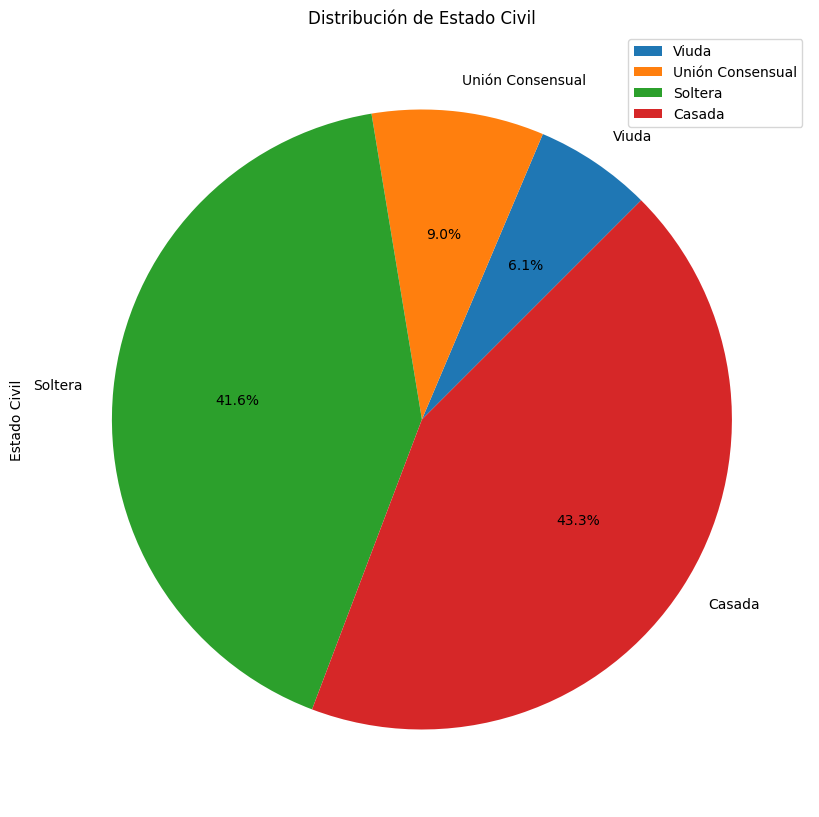

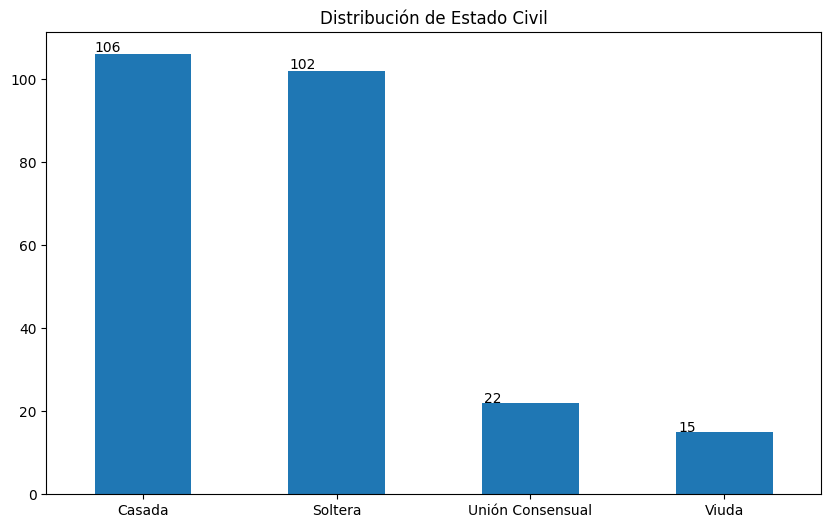

In [54]:
univariate_analysis(df, "Estado Civil", rotation=0)

#### Edad:

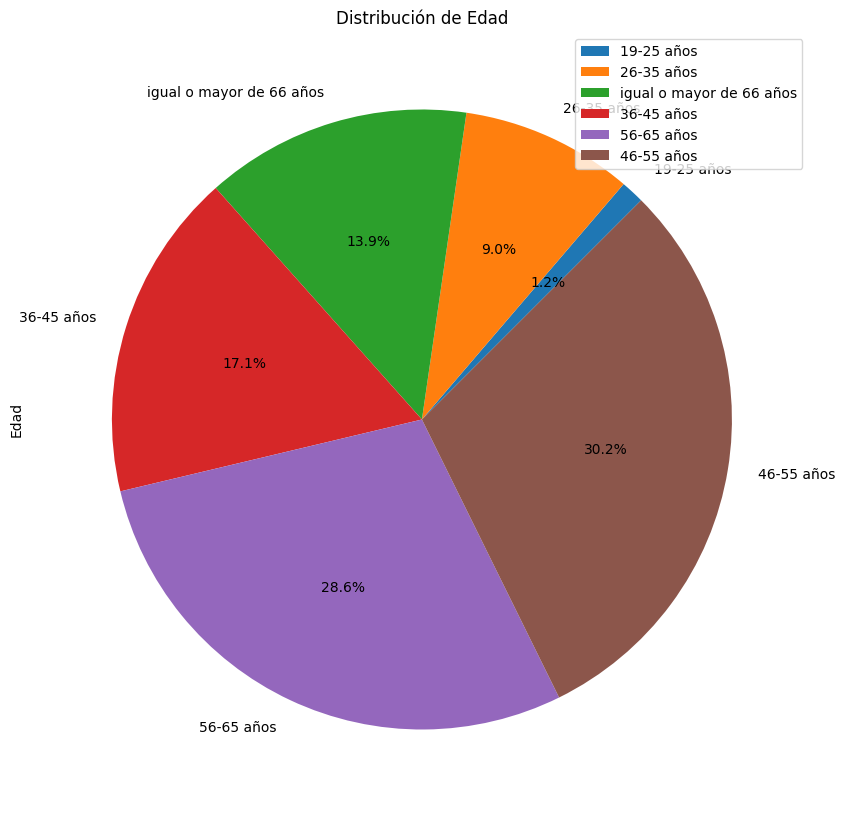

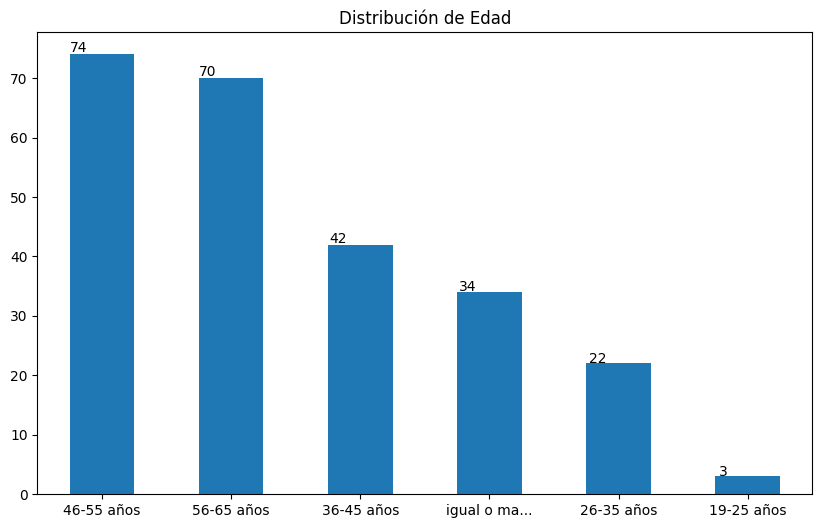

In [55]:
univariate_analysis(df, "Edad")

#### Departamento de procedencia:

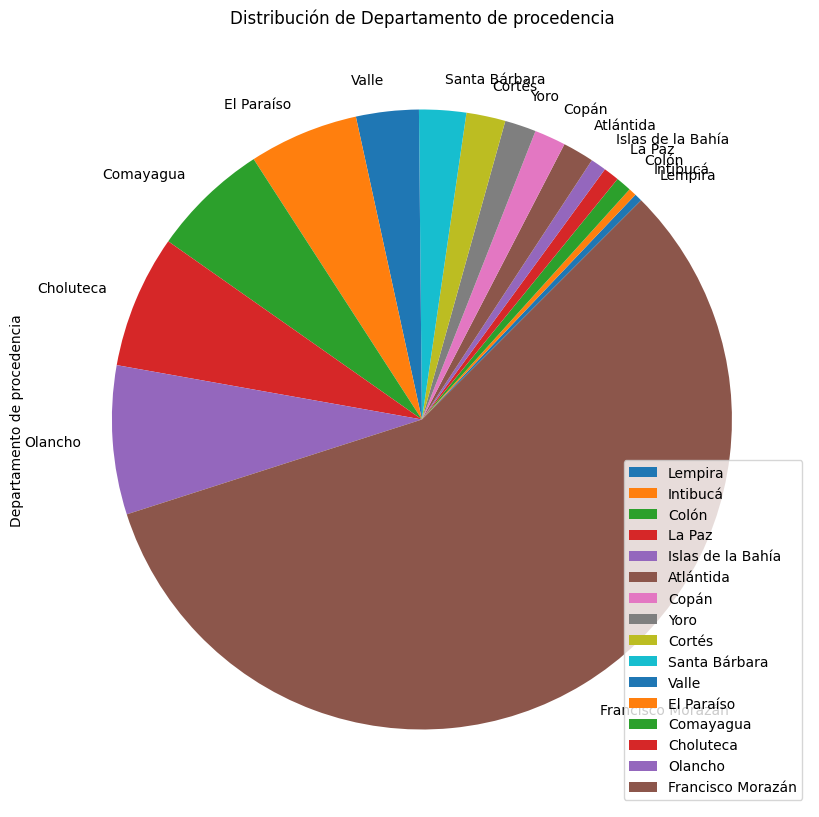

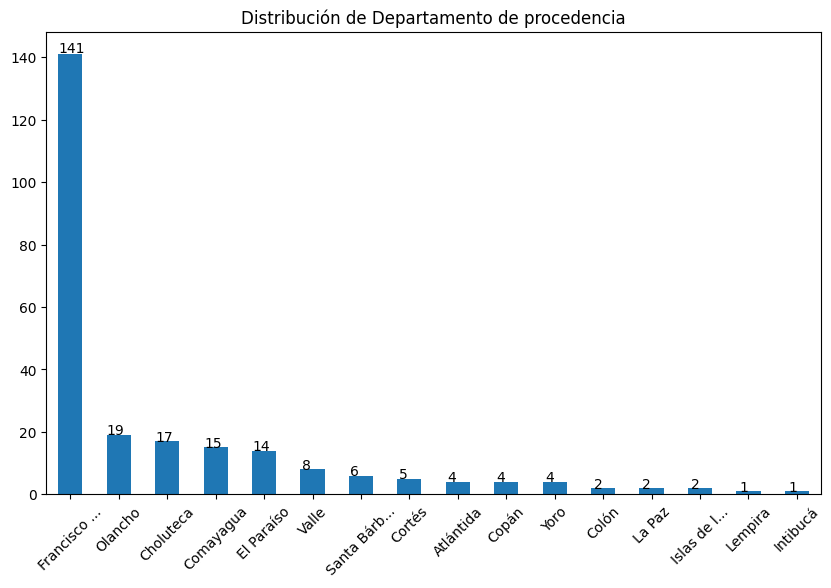

In [56]:
univariate_analysis(df, "Departamento de procedencia", pie_percentage=False, rotation=45, label_truncate=10) # todo: make the pct optional, and figure a way to add explosion for the pie chart.


#### Factores de Riesgo:

Hay muchos factores individuales, solo incluiremos los que tegan una frecuencia más alta de 10 ocurrencias:

In [57]:
df["Número de Factores de Riesgo"].fillna(0, inplace=True) # temporary solution to the nulls in the risk factors column.

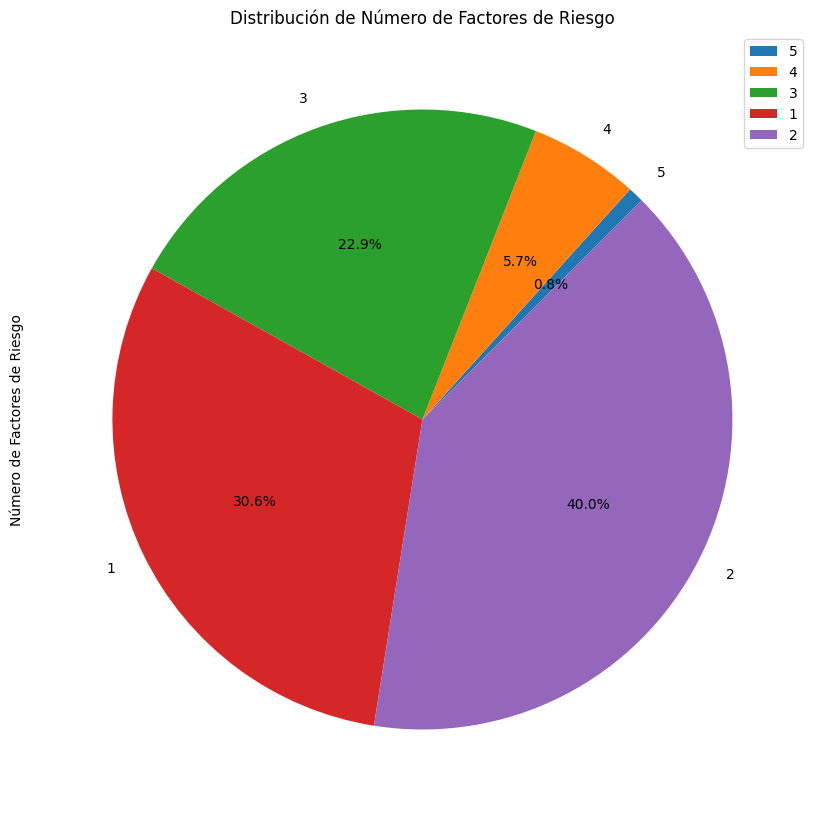

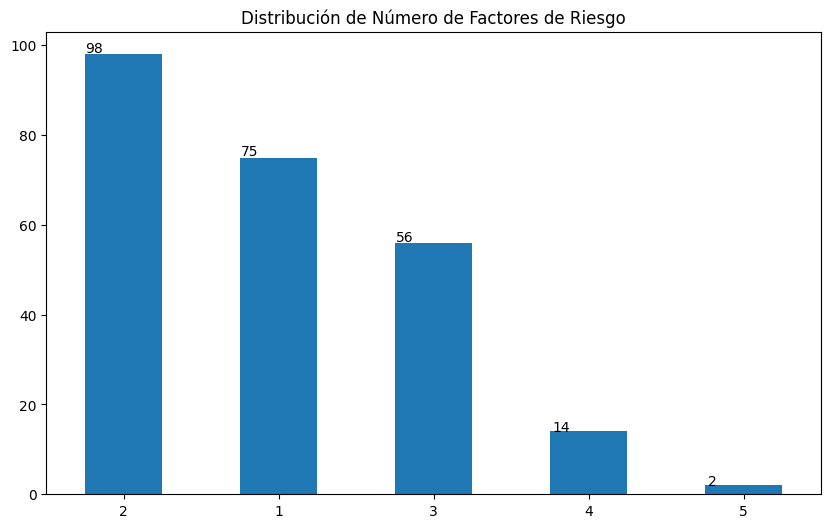

In [58]:
univariate_analysis(df, "Número de Factores de Riesgo")

#### Factores de Riesgo:

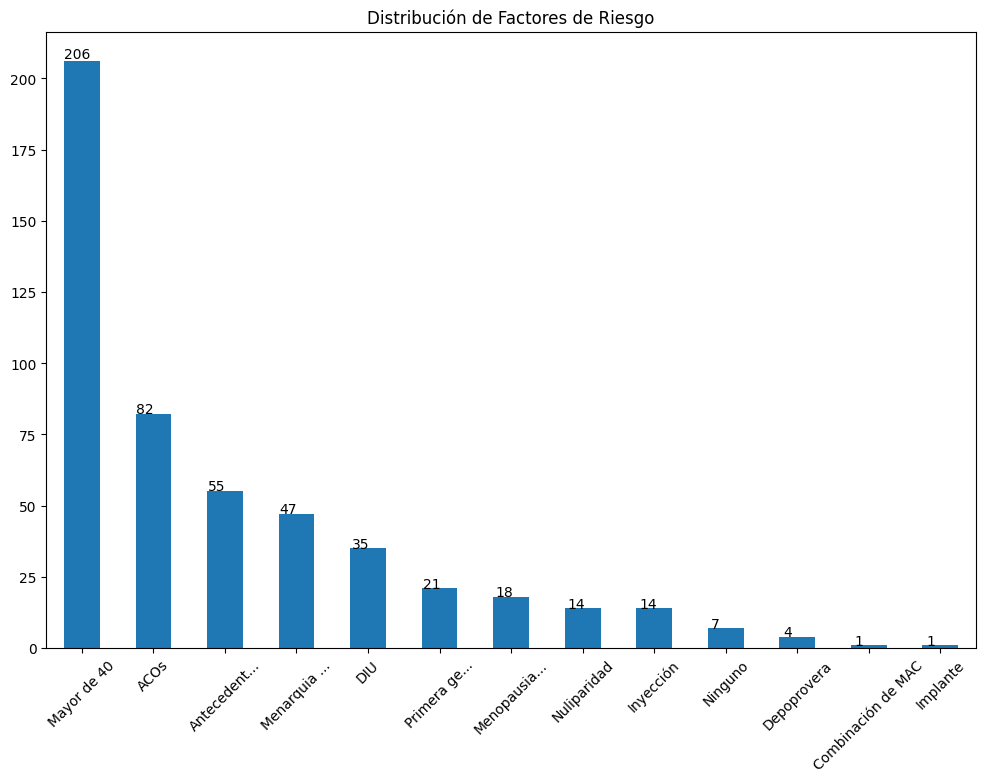

In [59]:
def get_risk_factor_counts(df, column):
    # Split the strings in the column on the comma and strip whitespace
    # df[column] = df[column].str.split(',').apply(lambda x: [item.strip() for item in x]) # commented out because we already did this in a previous section.

    # Explode the lists to get each risk factor as a separate row
    df_exploded = df.explode(column)

    # Risk Factor Mapping
    risk_factor_map = {
        'inyección':'Inyección',
        'Inyeción':'Inyección',
        'Inyección mensul':'Inyección',
        'Inyección 10 años':'Inyección',
        'DIU 5 años': 'DIU',
        'DIU 3 años': 'DIU',
        'DIU 8 años': 'DIU',
        'DIU  15 años': 'DIU',
        'ACOS 3 años': 'ACOs',
        'Implanon':'Implante',
        'IMPLANTE':'Implante',
        'implante':'Implante',
        'Primer gesta despues de los 30': 'Primera gesta después de los 30',
        'Menopausia despues de lo 52 años':'Menopausia después de los 52 años',
        'Inyección por 6 años  y DIU por 2 meses':'Combinación de MAC',
        'Antecedentes familiares':'Antecedentes Familiares',
        '':'Ninguno'
    }

    df_exploded[column] = df_exploded[column].replace(risk_factor_map)

    return df_exploded


df_exploded = get_risk_factor_counts(df, "Factores de Riesgo")


# Create the plot
ax = df_exploded['Factores de Riesgo'].value_counts().plot(kind='bar', title="Distribución de Factores de Riesgo", figsize=(12, 8), rot=45)

# Get the current tick labels
labels = [item.get_text() for item in ax.get_xticklabels()]

# Truncate the labels to the first 10 characters and set them as the new labels
ax.set_xticklabels([label[:10] + '...' if len(label) > 20 else label for label in labels])

# Add the value count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


plt.show()

#### Tipo Histológico:

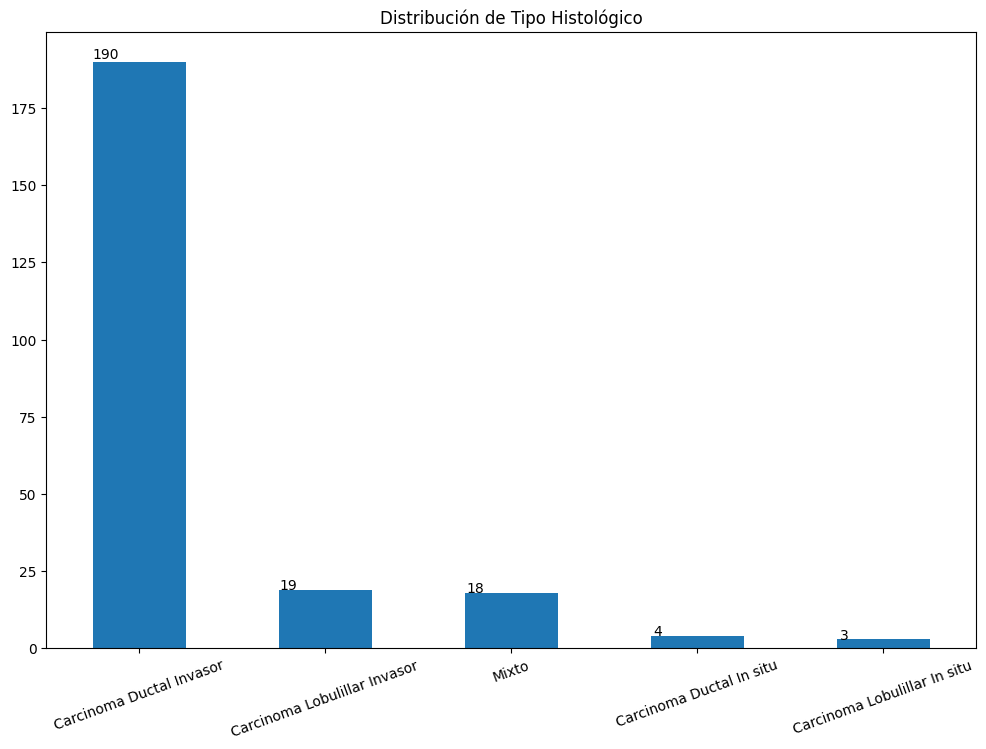

In [60]:
# Get the value counts
value_counts = df["Tipo Histológico"].value_counts()

# Filter to only include values that occur more than n times
n = 2
filtered_value_counts = value_counts[value_counts > n]

# Create the bar plot
ax = filtered_value_counts.plot(kind='bar', title="Distribución de Tipo Histológico", figsize=(12, 8), rot=20)

# Add the value count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#### HER2

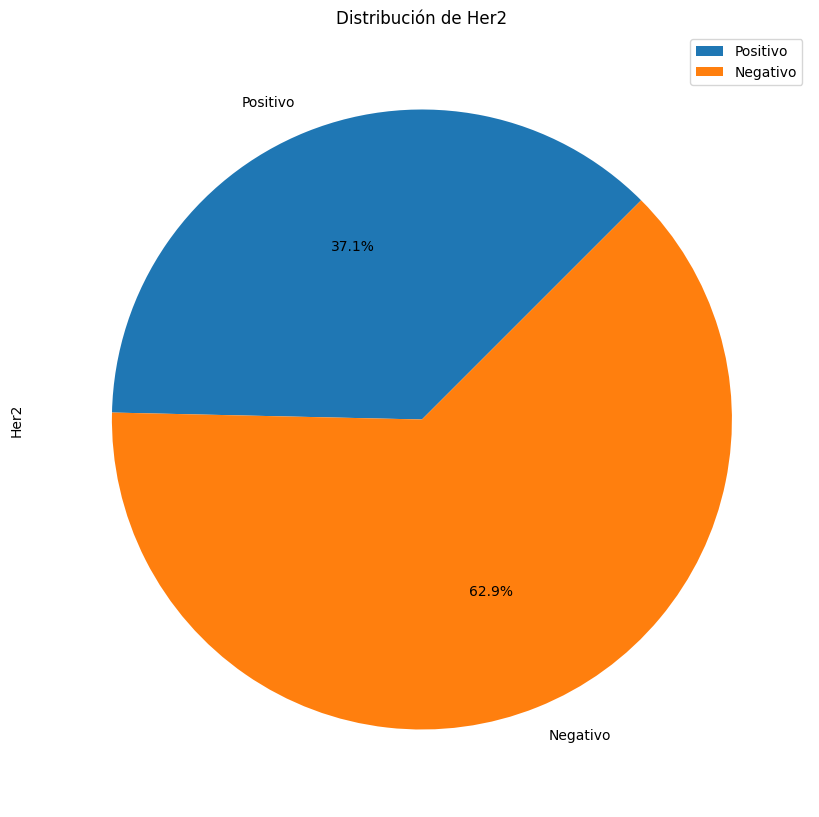

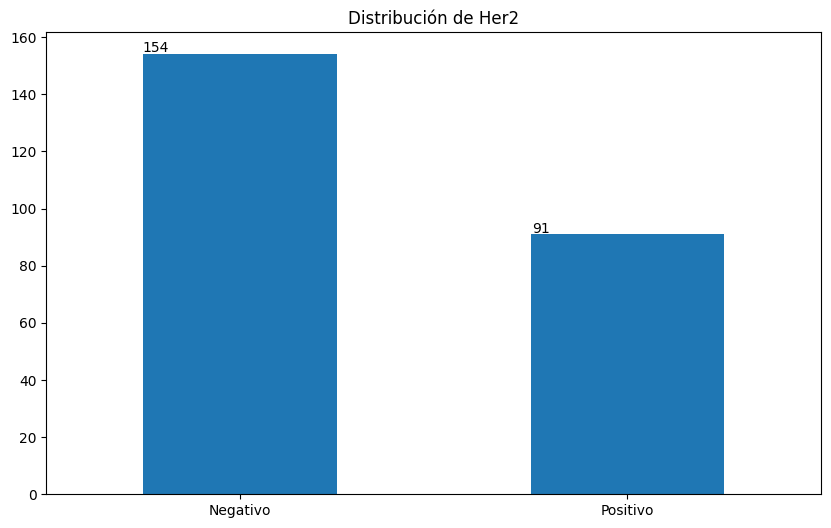

In [61]:
univariate_analysis(df, "Her2")

#### Receptor Progesterona

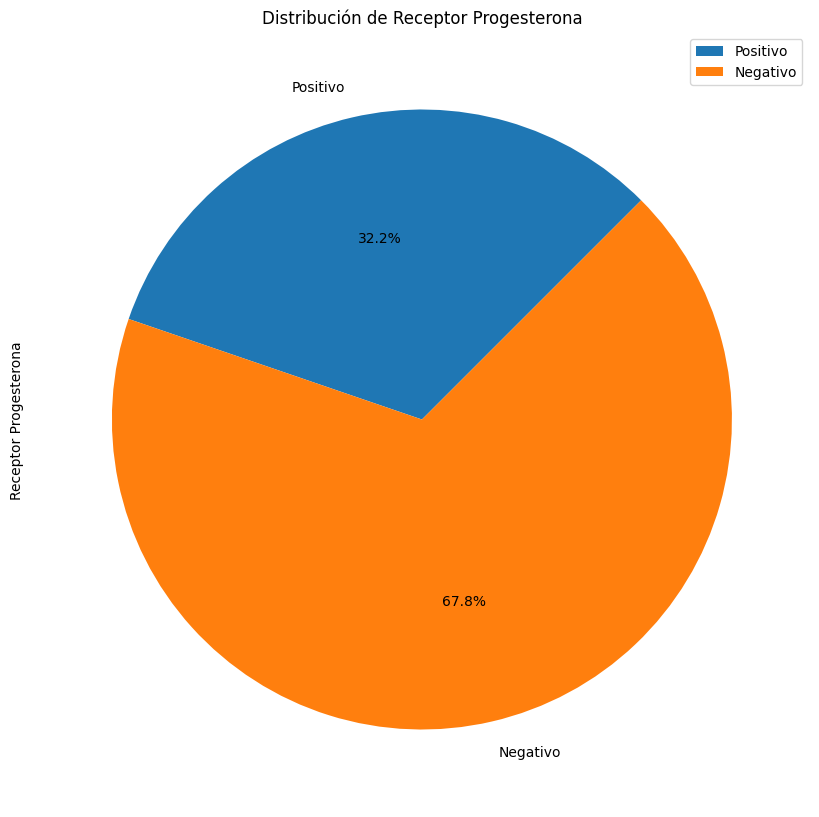

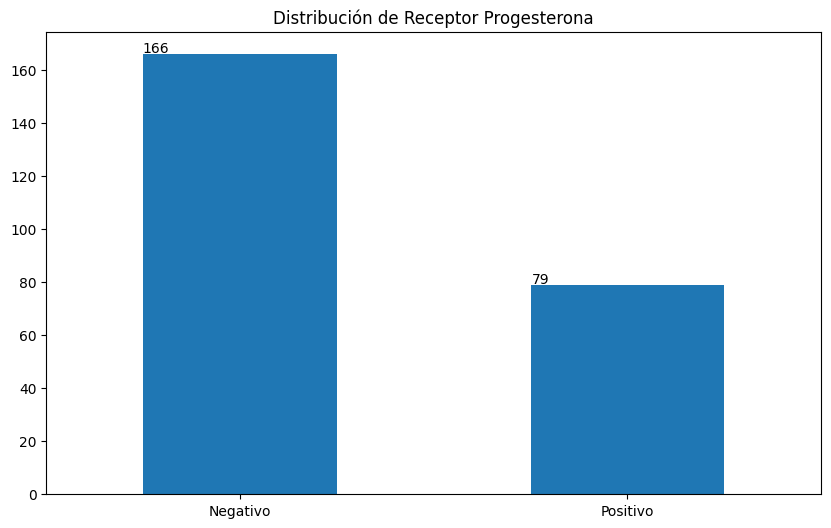

In [62]:
univariate_analysis(df, "Receptor Progesterona")

#### Receptor Estrogeno

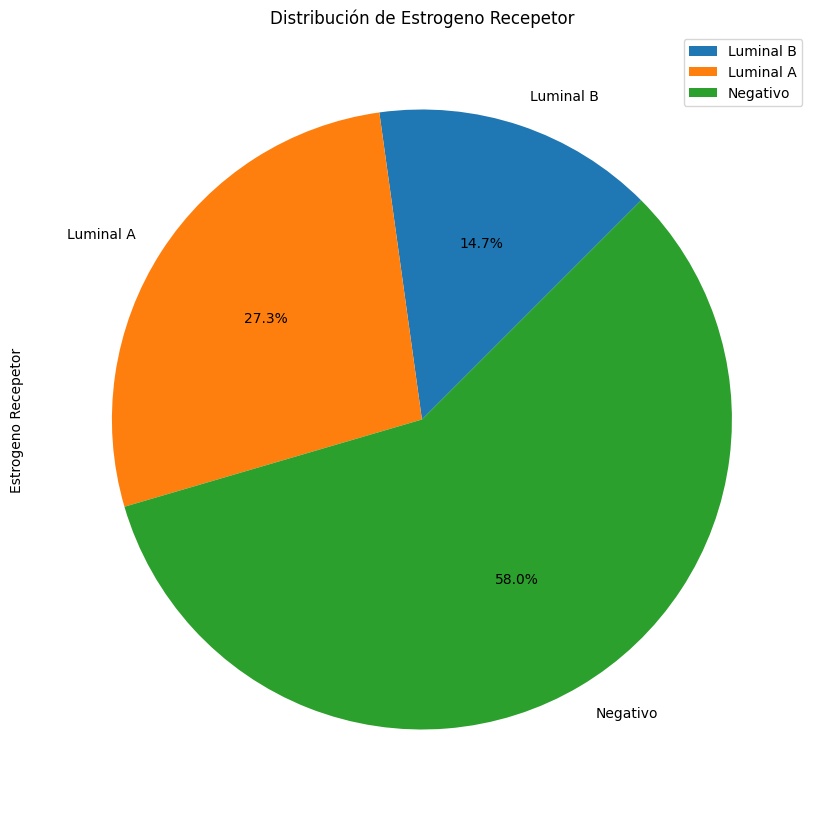

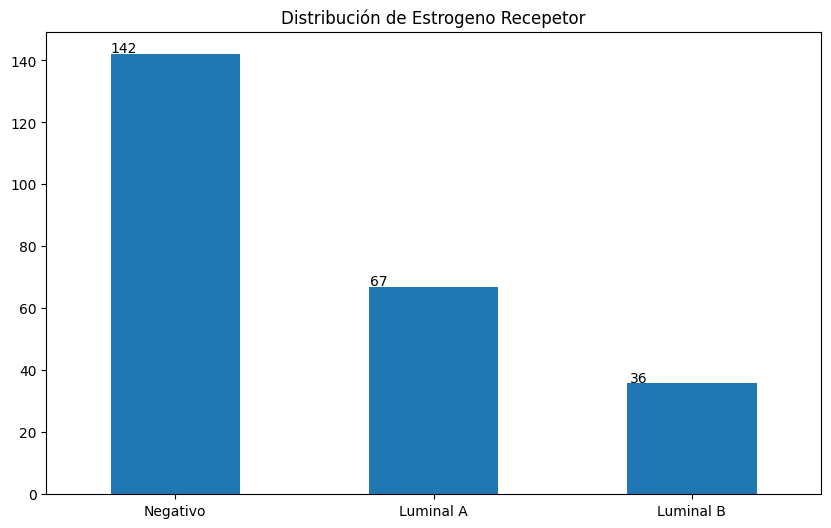

In [63]:
univariate_analysis(df, "Estrogeno Recepetor")

#### Linfonodos:

In [64]:
lymph = df[df["Linfonodos"].notnull()]

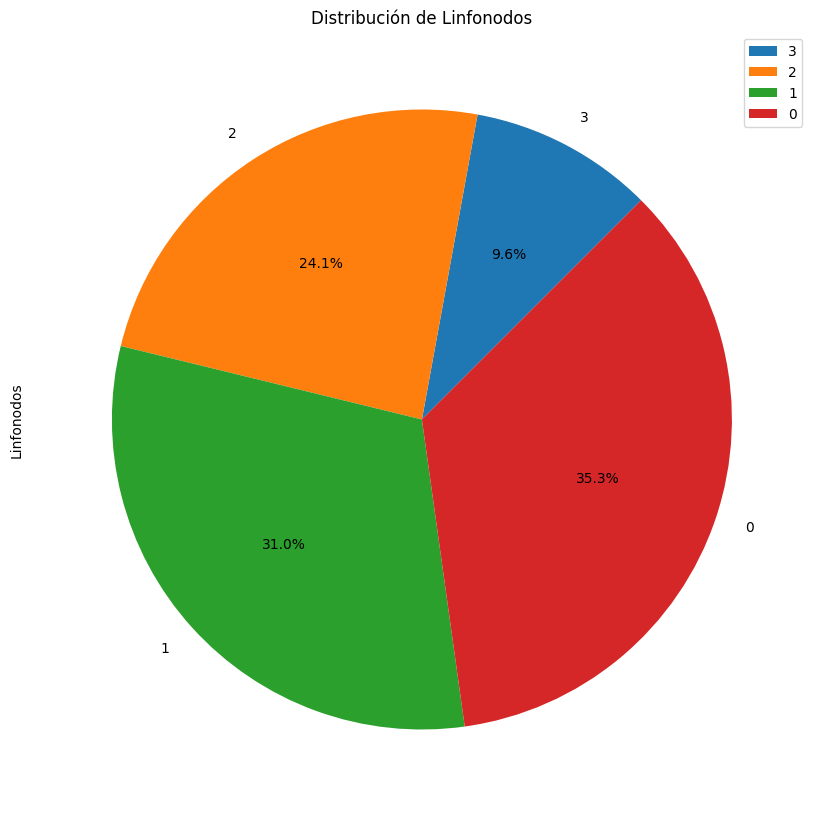

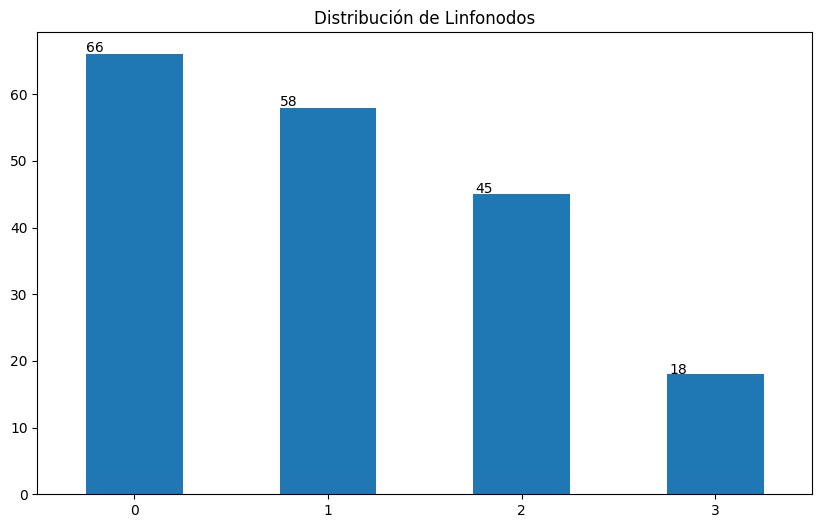

In [65]:
univariate_analysis(lymph, "Linfonodos")

#### Linfonodos with NA:

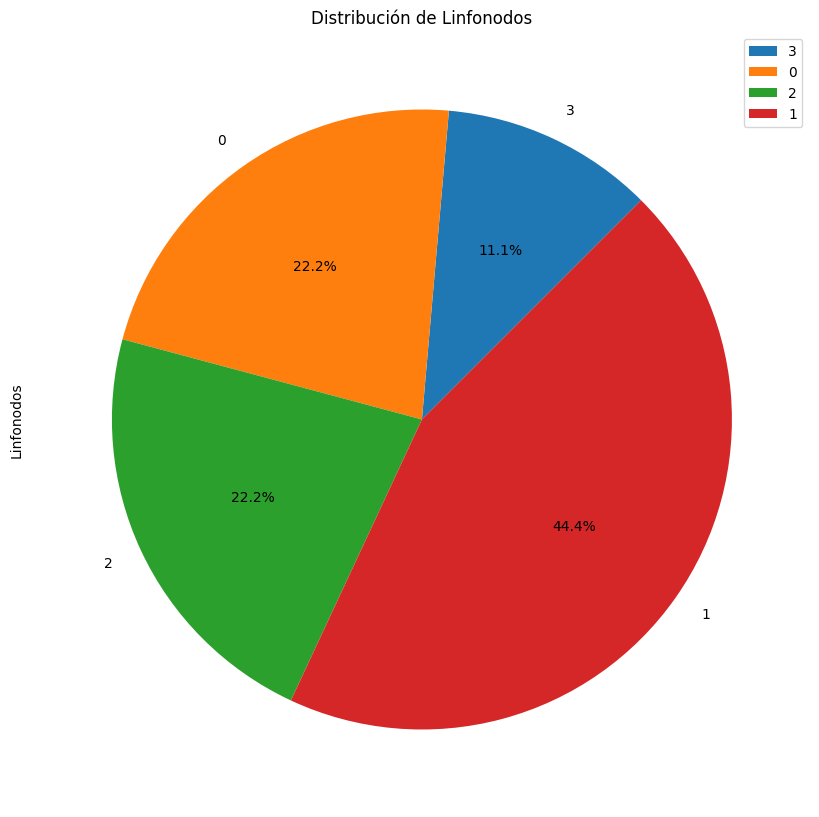

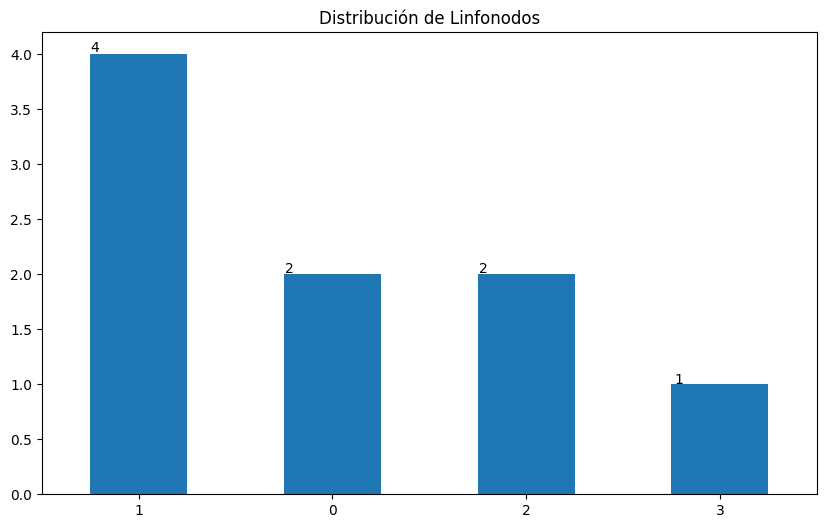

In [66]:
# df["Linfonodos"].fillna("Sin datos", inplace=True)
df_drop_na = df.dropna()
univariate_analysis(df_drop_na, "Linfonodos")

#### Metástasis

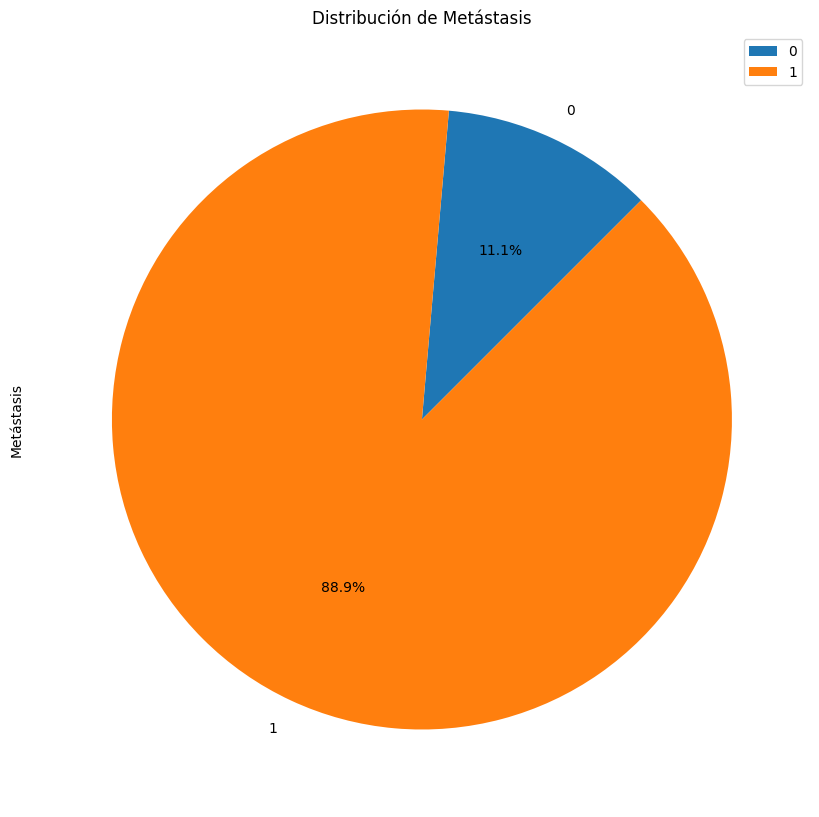

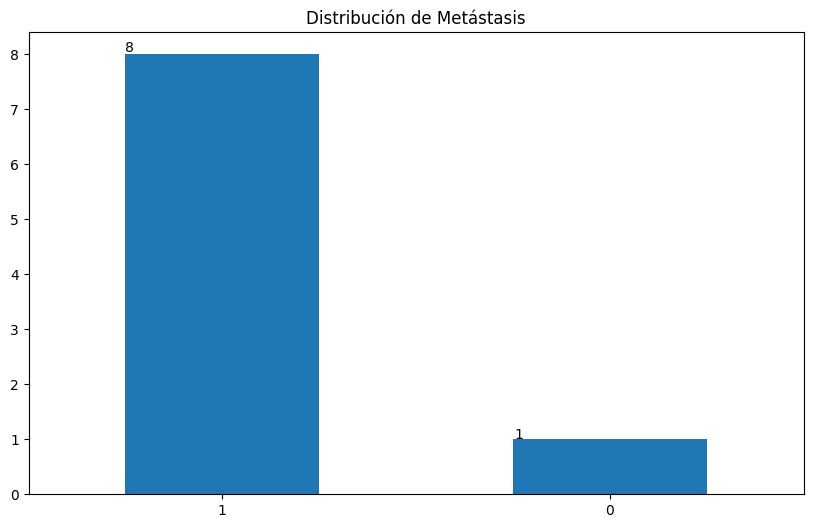

In [67]:

univariate_analysis(df_drop_na, "Metástasis")

#### Número de sitios de Metástasis:

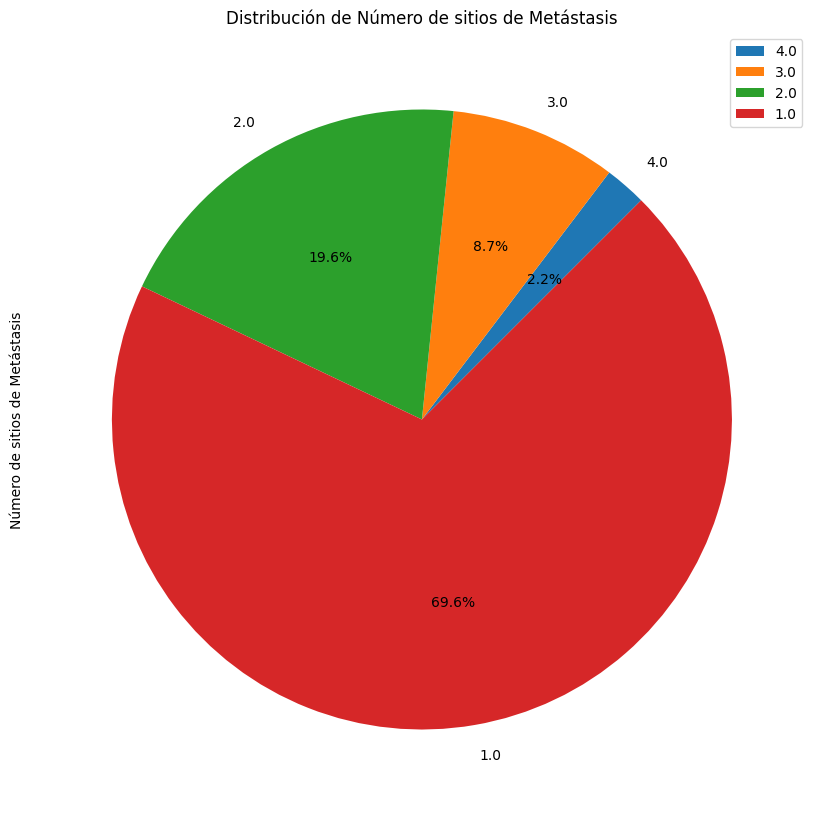

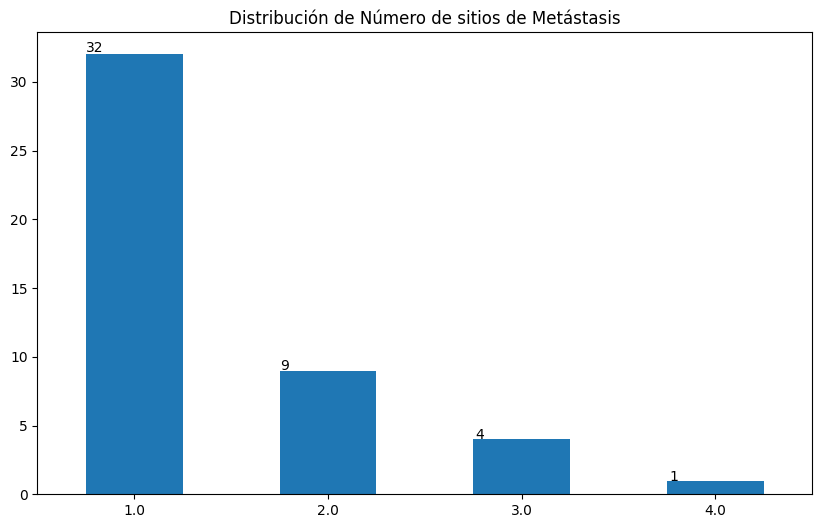

In [68]:
univariate_analysis(df, "Número de sitios de Metástasis")

In [69]:
df['Número de sitios de Metástasis'].value_counts().sum()

46

Hay una discrepancia entre la cuenta de `Número de sitios de Metástasis` con `Metástasis` y `Etapa del Cáncer al ingreso`. 

#### Etapa del cancer al ingreso:

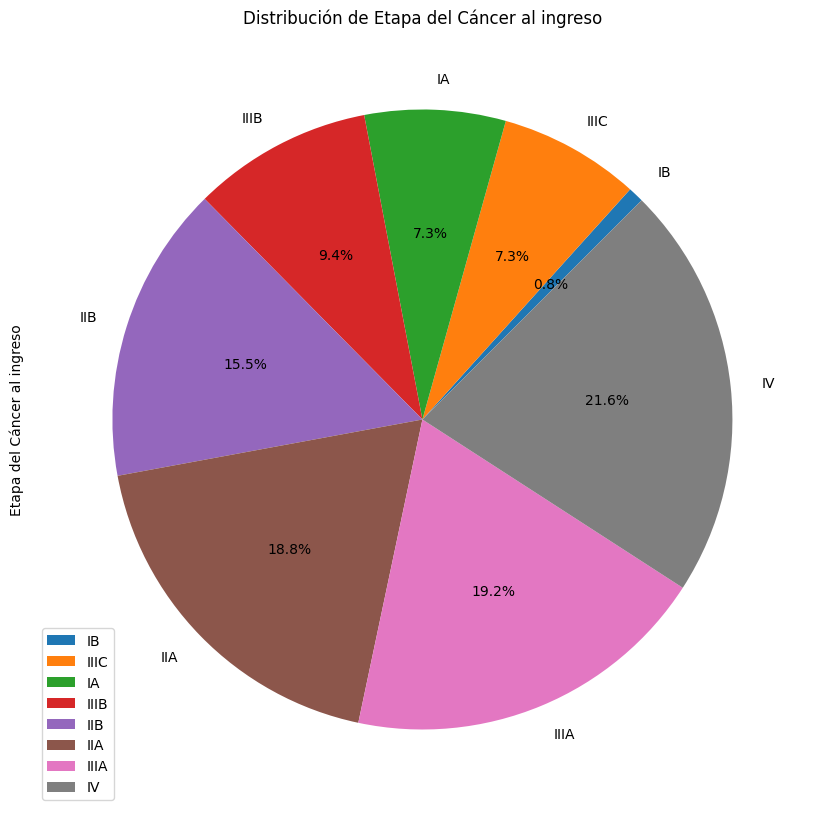

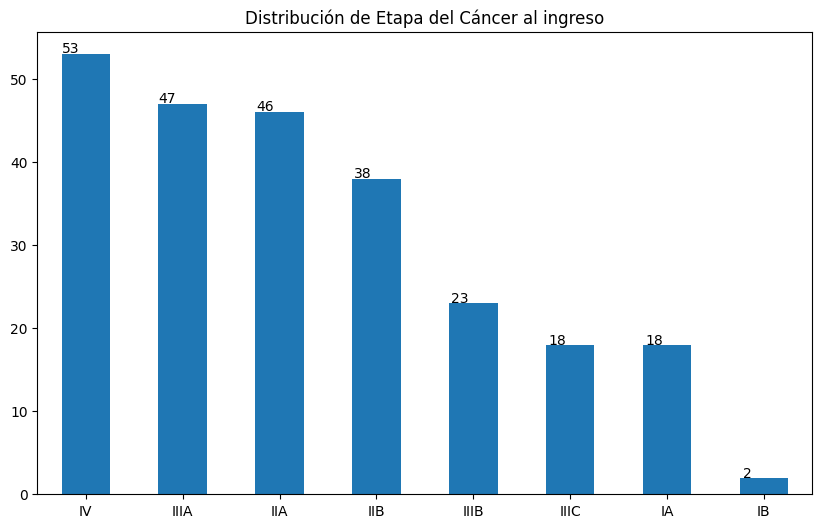

In [70]:
univariate_analysis(df, "Etapa del Cáncer al ingreso")

#### Procedimiento Quirurgico:

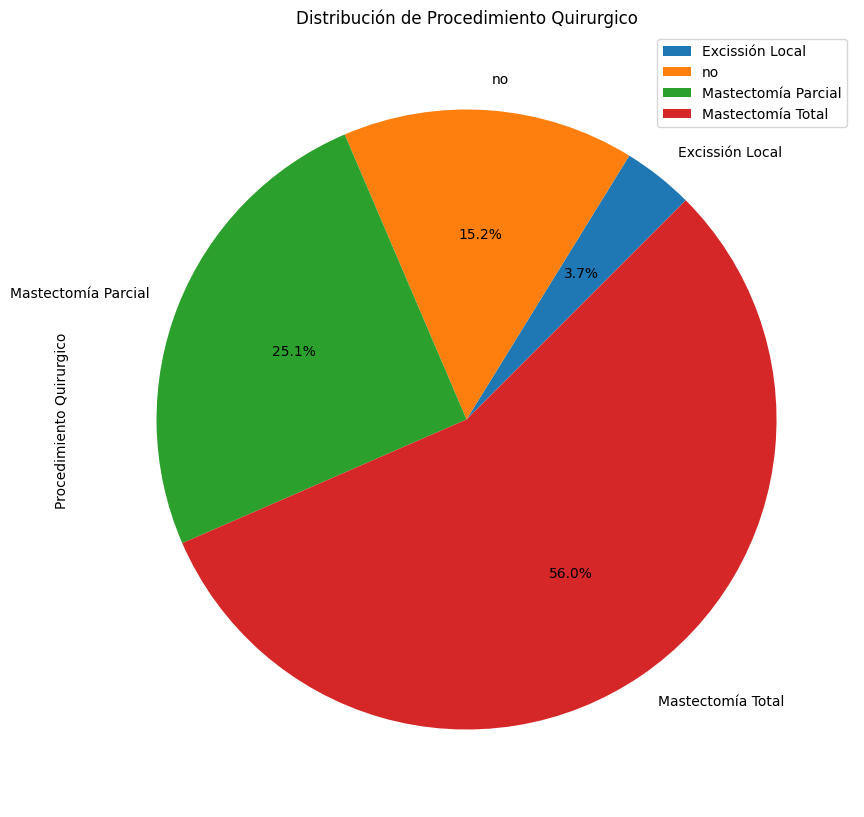

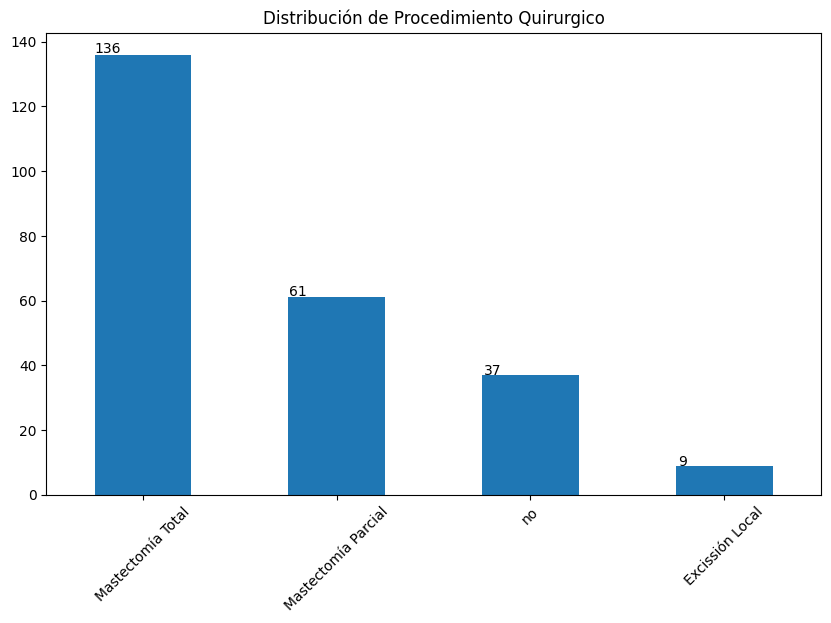

In [71]:
univariate_analysis(df, "Procedimiento Quirurgico", rotation=45)

#### Radioterapia:

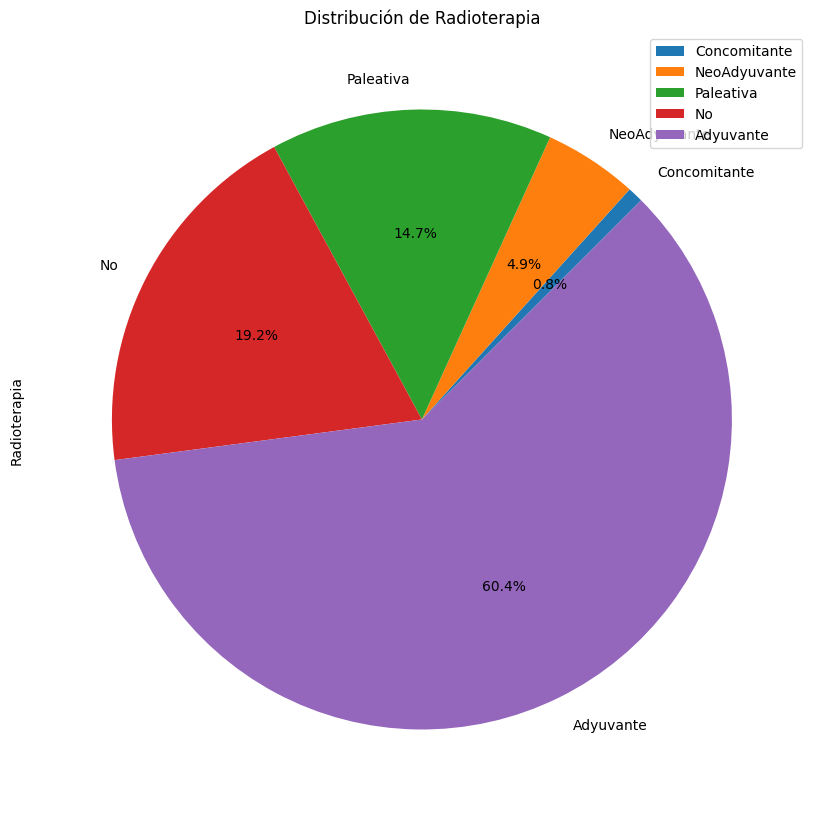

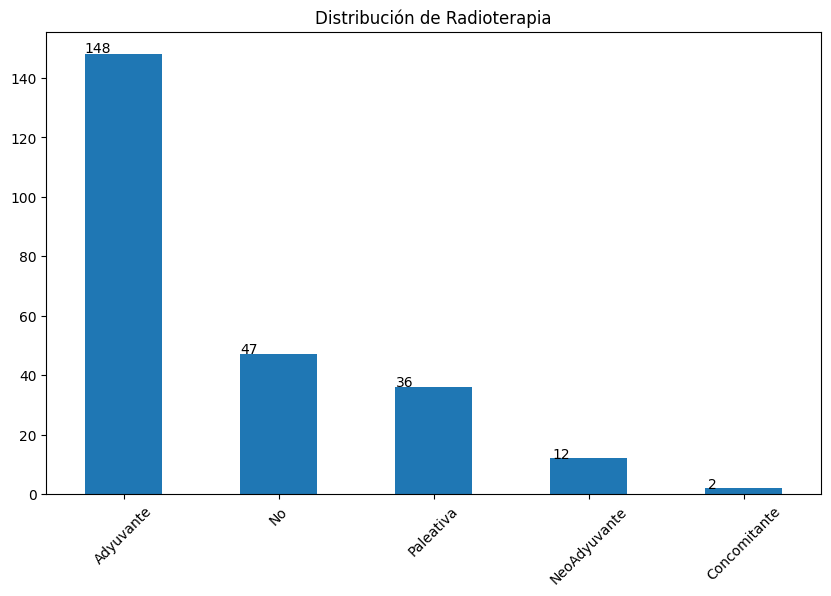

In [72]:
univariate_analysis(df, "Radioterapia", rotation=45)

#### Quimioterapia

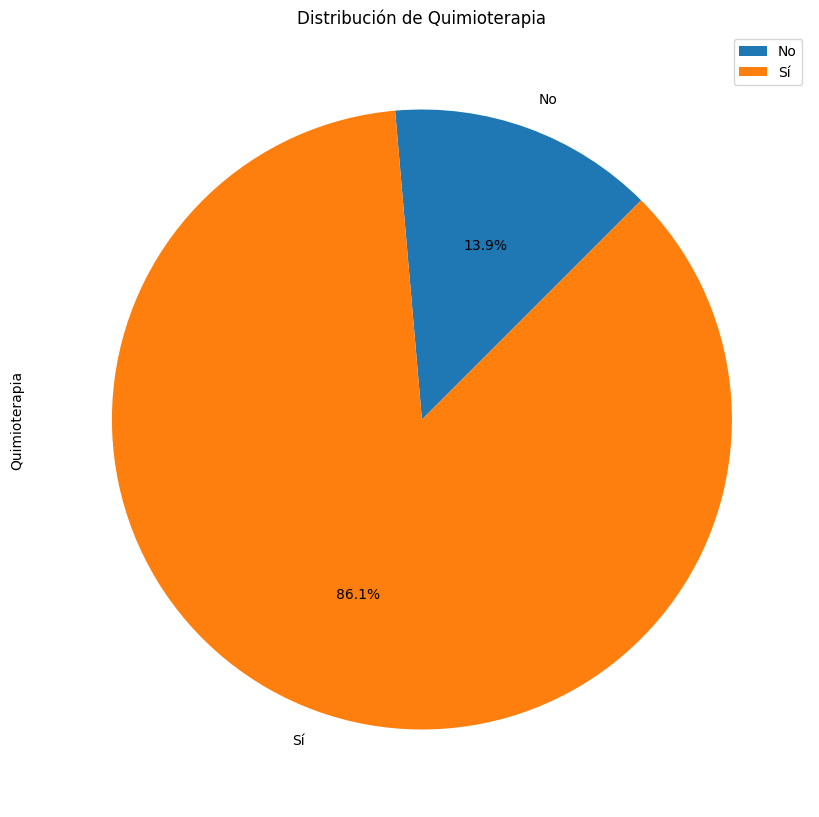

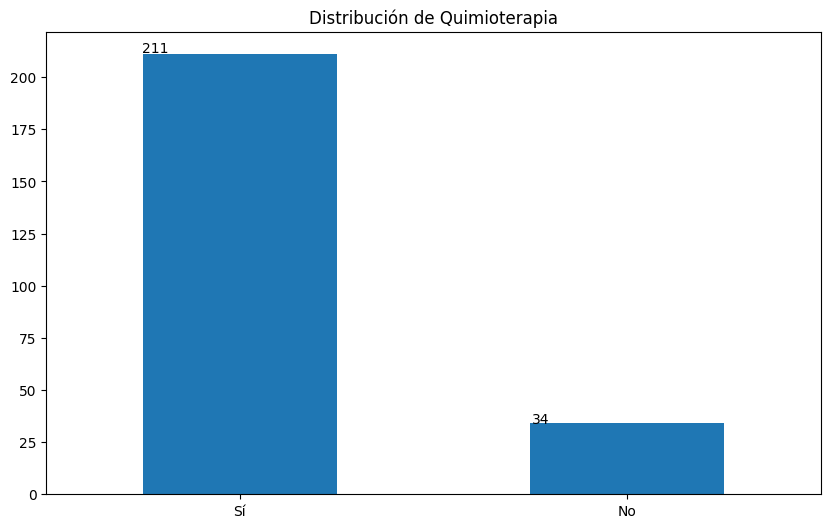

In [73]:
univariate_analysis(df, "Quimioterapia")


#### Hormonoterapia:

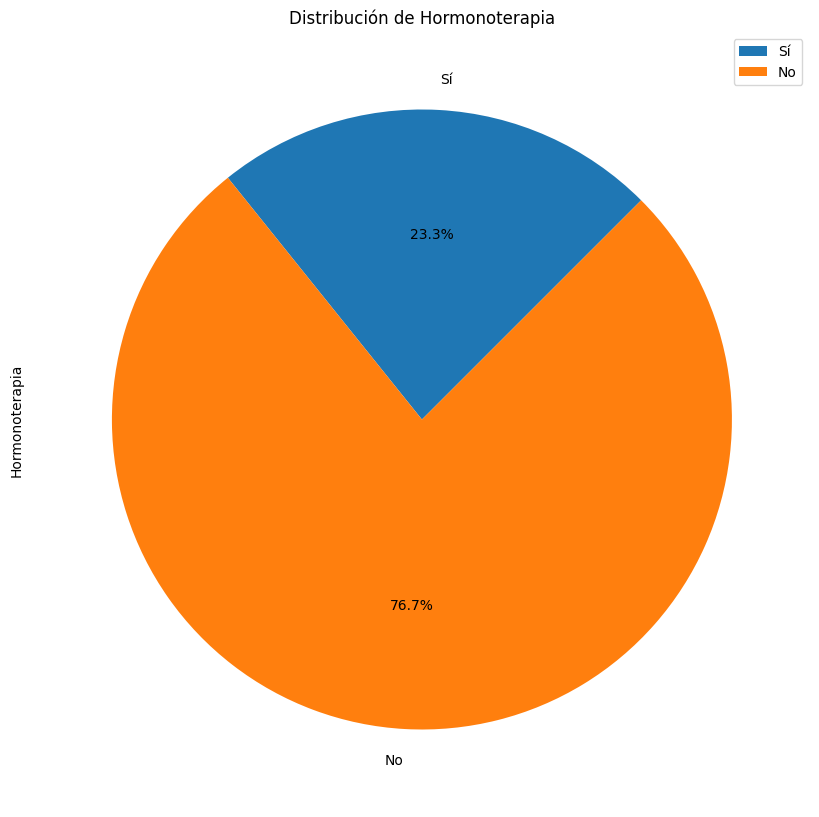

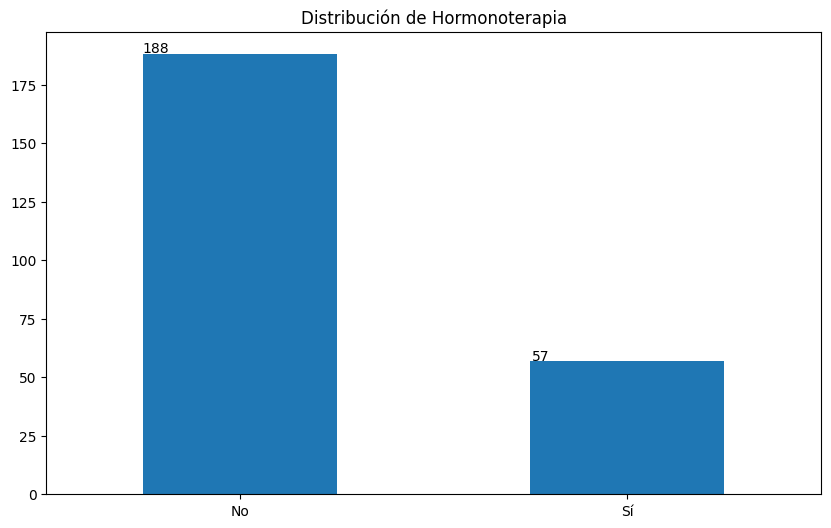

In [74]:
univariate_analysis(df, "Hormonoterapia")

#### Sobrevida a los 60 meses:

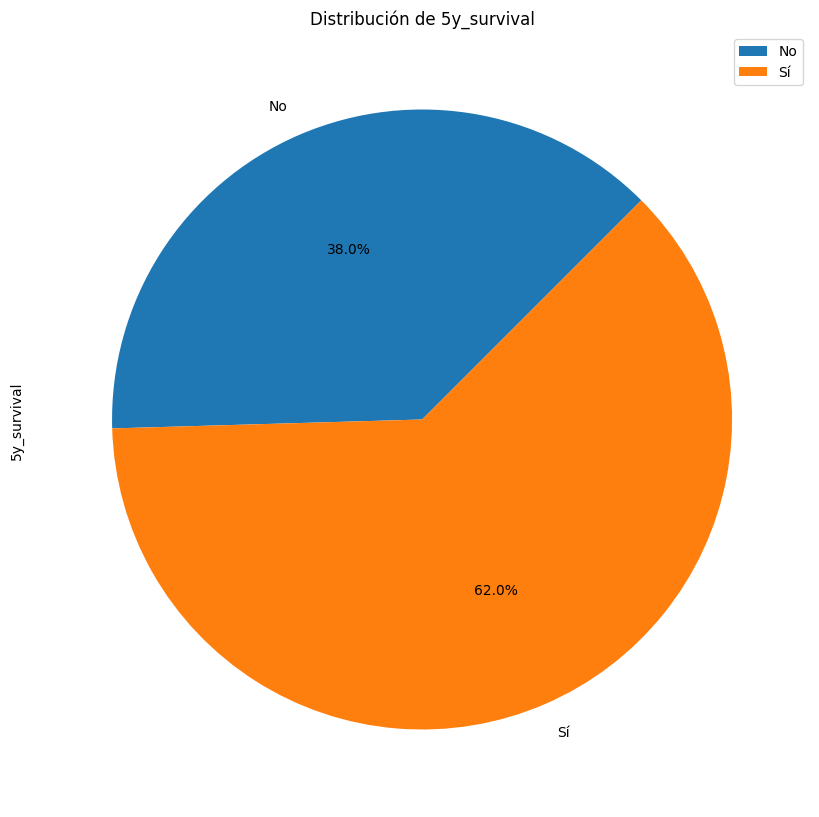

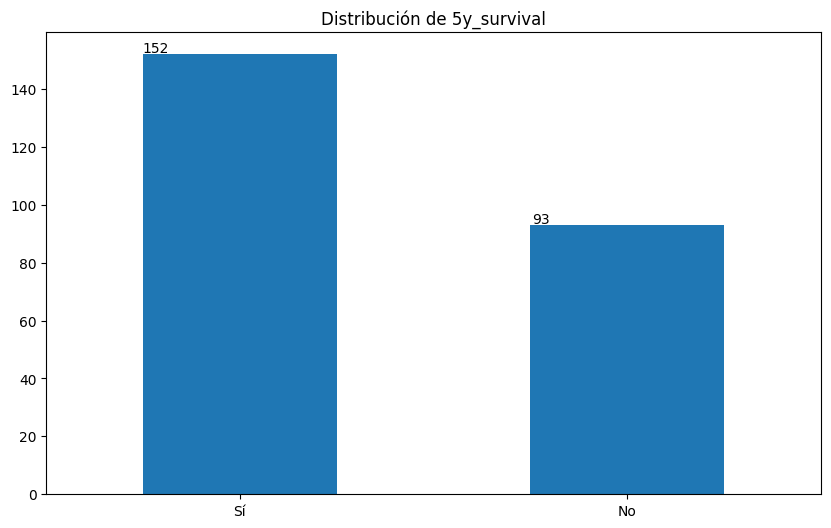

In [75]:
univariate_analysis(df, "5y_survival")

### Análisis Multivariado

Análisis correlacional:
Sobrevida con: 
- Tipo histológico
- Receptores hormonales
- Etapa de cáncer al ingreso
- Procedimiento quirúrgico
- Radioterapia
- Quimioterapia
- Hormonoterapia

Etapa de cáncer al ingreso con:
- Procedimiento quirúrgico
- Radioterapia
- Quimioterapia
- Hormonoterapia

Tipo histológico con: 
- Receptores hormonales
- Sitio de metástasis

In [76]:
def multivariate_analysis(data, x, y, figsize = (10, 6)):
    """
    Perform a multivariate analysis based on a pandas DataFrame.

    Parameters:
    - data: pandas DataFrame
        The dataset containing the columns to be analyzed.
    - x: str
        The name of the column to be used as the x-axis.
    - y: str
        The name of the column to be used as the y-axis.

    Returns:
    - A scatter plot showing the relationship between x and y.
    """

    # Create a cross-tabulation of x and y
    crosstab = pd.crosstab(data[x], data[y])

    # Plot the cross-tabulation as a scatter plot
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=x, hue=y)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.xlabel(x)
    plt.ylabel(f"Frecuencia de {y}")
    plt.title(f"Multivariate Analysis: {x} vs {y}")
    plt.show()


#### Tipo Histologico:

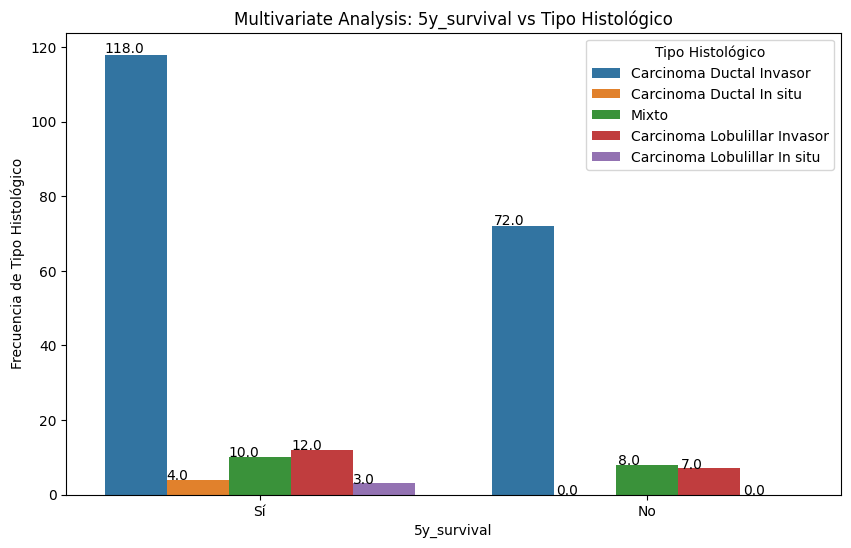

In [77]:
# Create the top 5 histological types:
top_5_tipos = df['Tipo Histológico'].value_counts().head(5).index
df_hist_5 = df[df['Tipo Histológico'].isin(top_5_tipos)]

# Plotting those specifically:
multivariate_analysis(df_hist_5, "5y_survival", "Tipo Histológico")

#### Receptores Hormonales:

Todos los receptores hormonales juntos:

In [101]:
# Create a new column that combines the values of the three columns
df['combined_hormone'] = "ER: " + df['Estrogeno Recepetor'].astype(str)  + " | " + "HER2: " + df['Her2'].astype(str) + " | " \
      + "PR: " + df['Receptor Progesterona'].astype(str)

# Get the frequency of each pair
frequency = df['combined_hormone'].value_counts()
frequency


ER: Negativo | HER2: Negativo | PR: Negativo     67
ER: Negativo | HER2: Positivo | PR: Negativo     65
ER: Luminal A | HER2: Negativo | PR: Positivo    46
ER: Luminal A | HER2: Negativo | PR: Negativo    21
ER: Luminal B | HER2: Positivo | PR: Positivo    15
ER: Luminal B | HER2: Positivo | PR: Negativo     9
ER: Negativo | HER2: Negativo | PR: Positivo      8
ER: Luminal B | HER2: Negativo | PR: Positivo     8
ER: Luminal B | HER2: Negativo | PR: Negativo     4
ER: Negativo | HER2: Positivo | PR: Positivo      2
Name: combined_hormone, dtype: int64

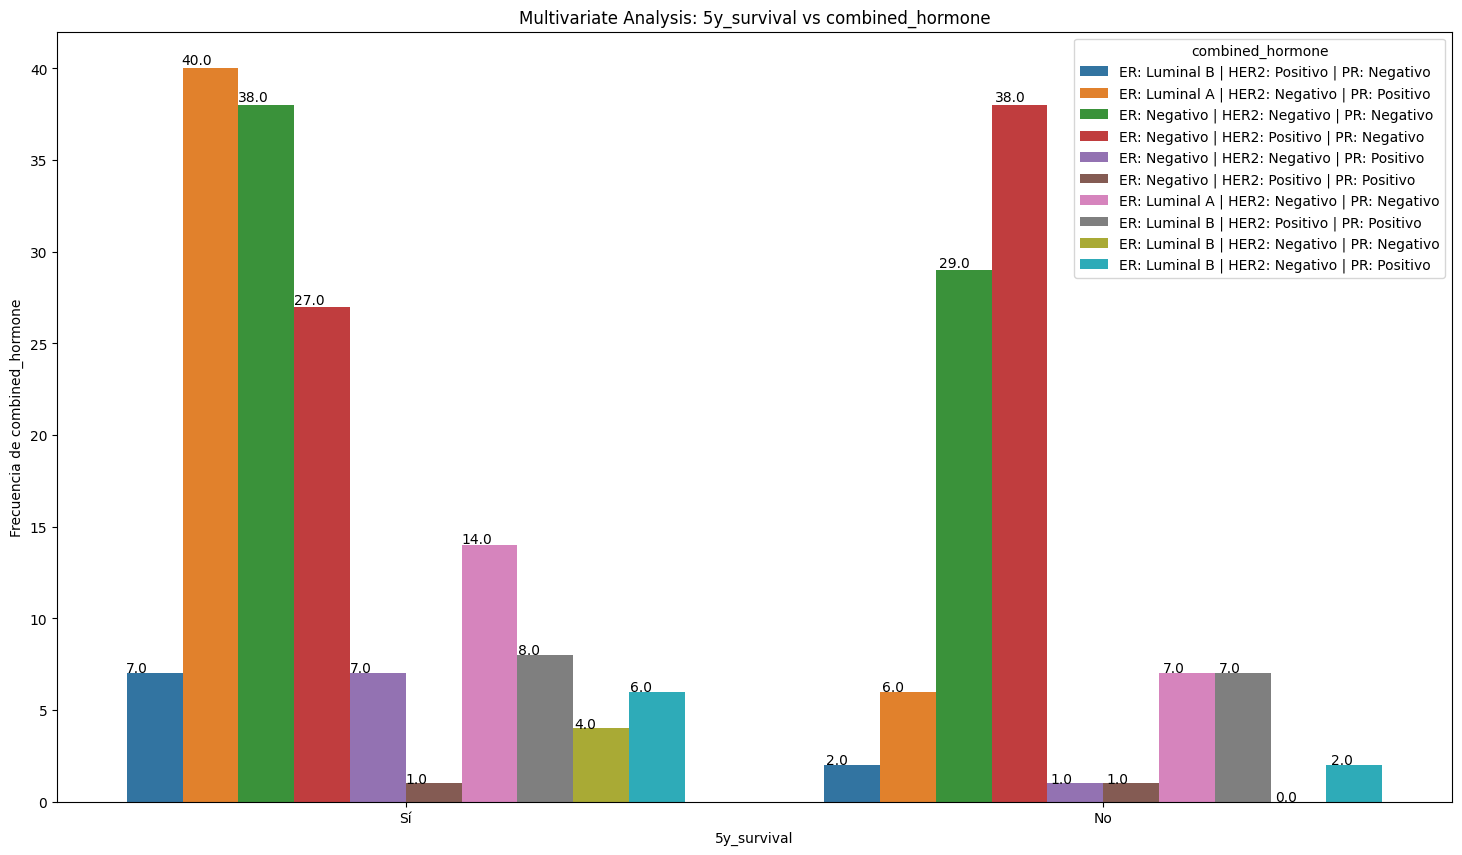

In [79]:
multivariate_analysis(df, "5y_survival", "combined_hormone", (18, 10))

#### Receptor Estrogeno:

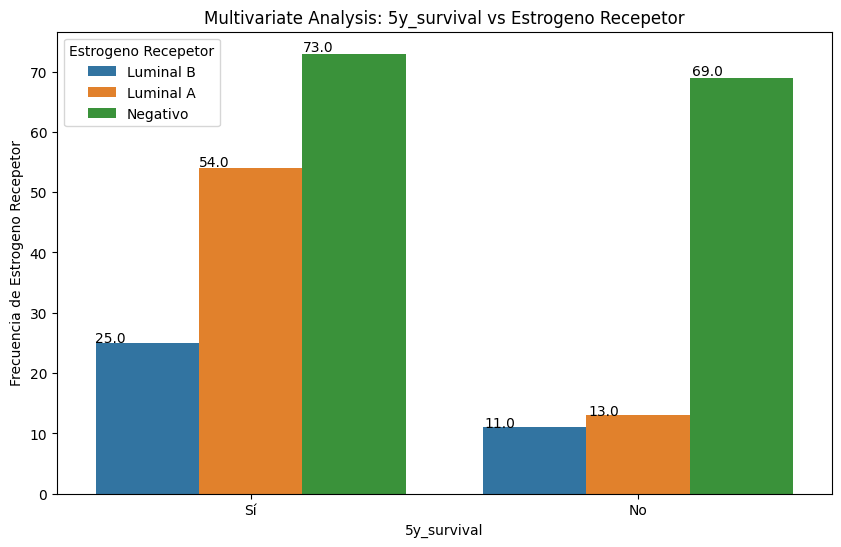

In [80]:
multivariate_analysis(df, "5y_survival", "Estrogeno Recepetor")

#### Receptor Progesterona:

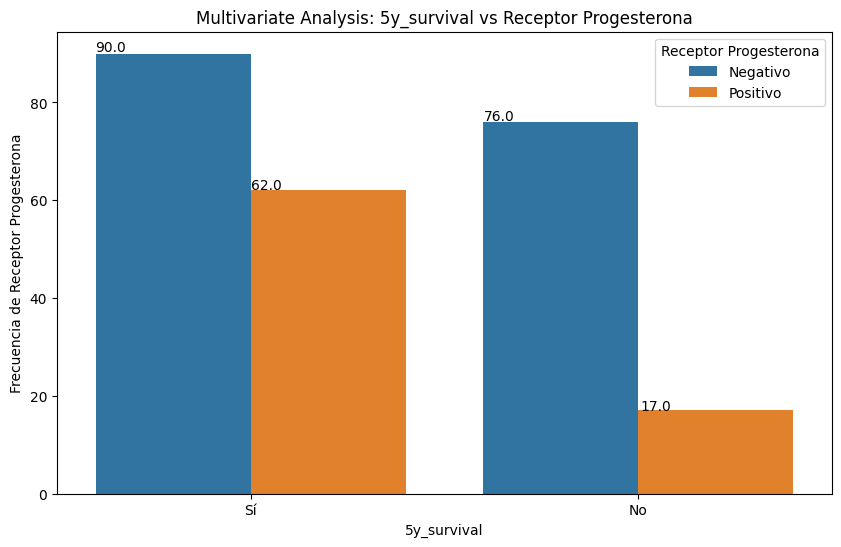

In [81]:
multivariate_analysis(df, "5y_survival", "Receptor Progesterona")

##### HER2:

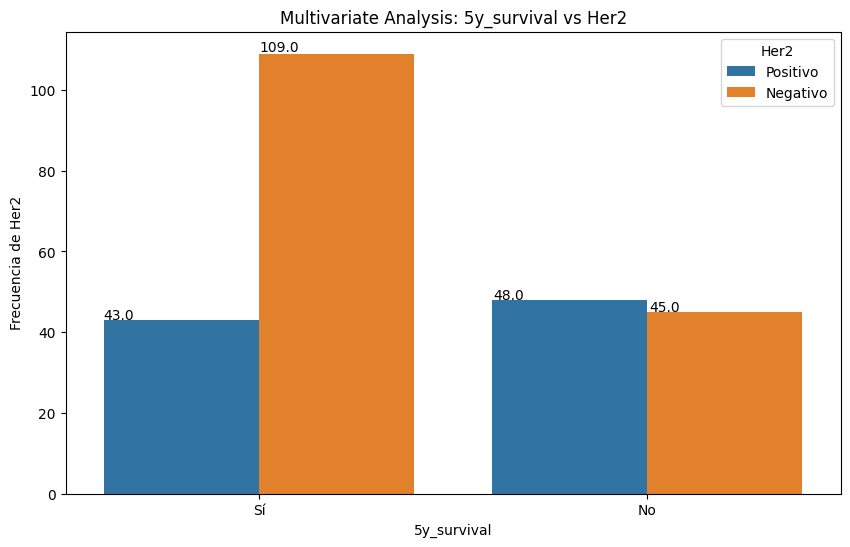

In [82]:
multivariate_analysis(df, "5y_survival", "Her2")

#### Etapa de cáncer al ingreso:

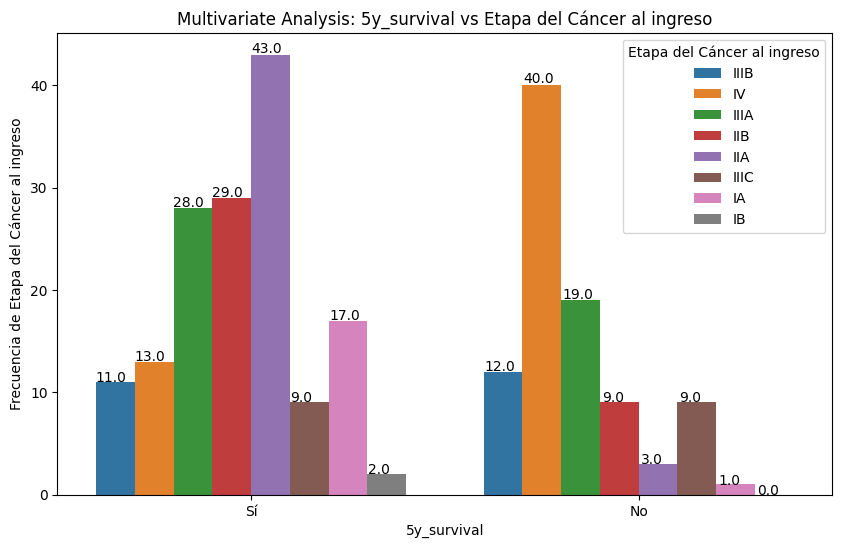

In [83]:
multivariate_analysis(df, "5y_survival", "Etapa del Cáncer al ingreso")

#### Procedimiento Quirúrgico:

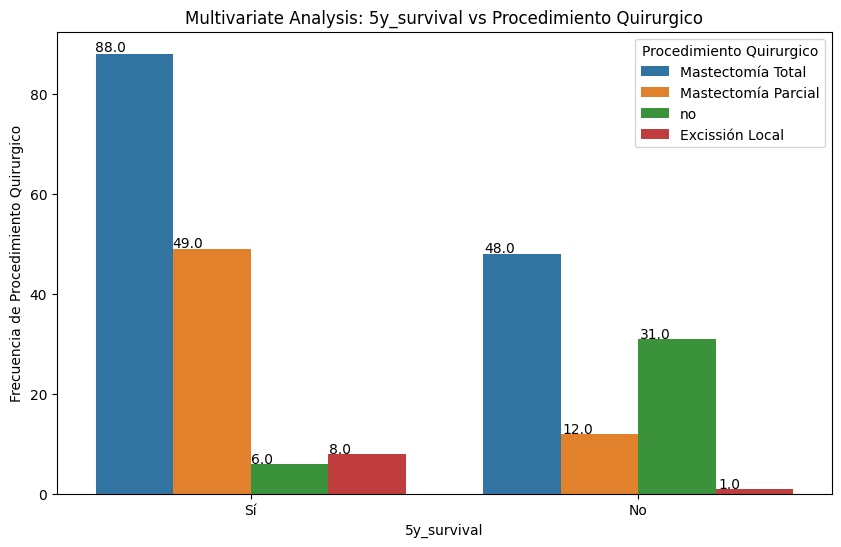

In [84]:
multivariate_analysis(df, "5y_survival", "Procedimiento Quirurgico")

#### Radioterapia:

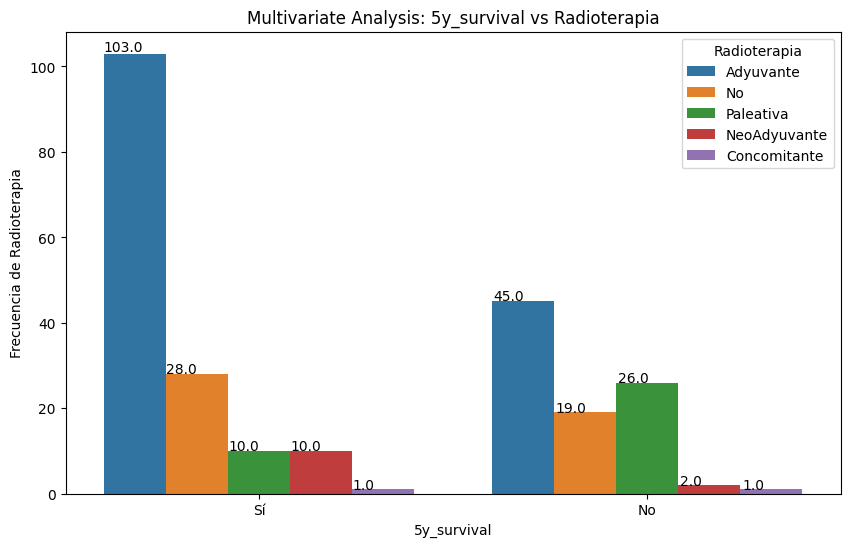

In [85]:
multivariate_analysis(df, "5y_survival", "Radioterapia")

#### Quimioterapia:

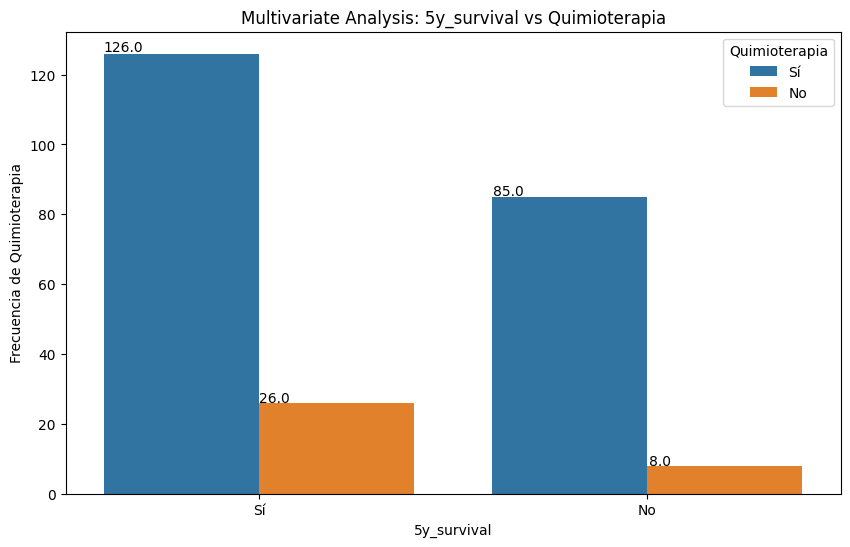

In [86]:
multivariate_analysis(df, "5y_survival", "Quimioterapia")

#### Hormonoterapia

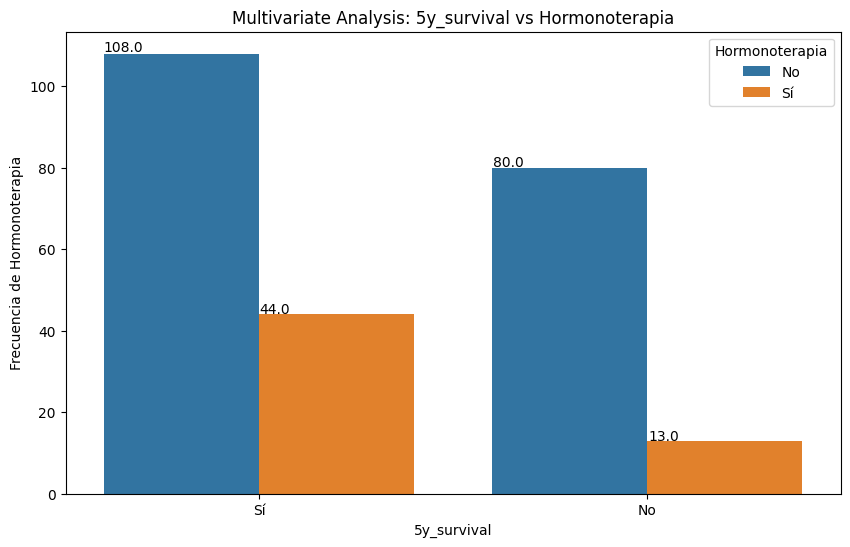

In [87]:
multivariate_analysis(df, "5y_survival", "Hormonoterapia")

### Analisis de Etapa de Cáncer al ingreso:

#### Etapa del Cáncer al ingreso vs. Procedimiento Quirúrgico:

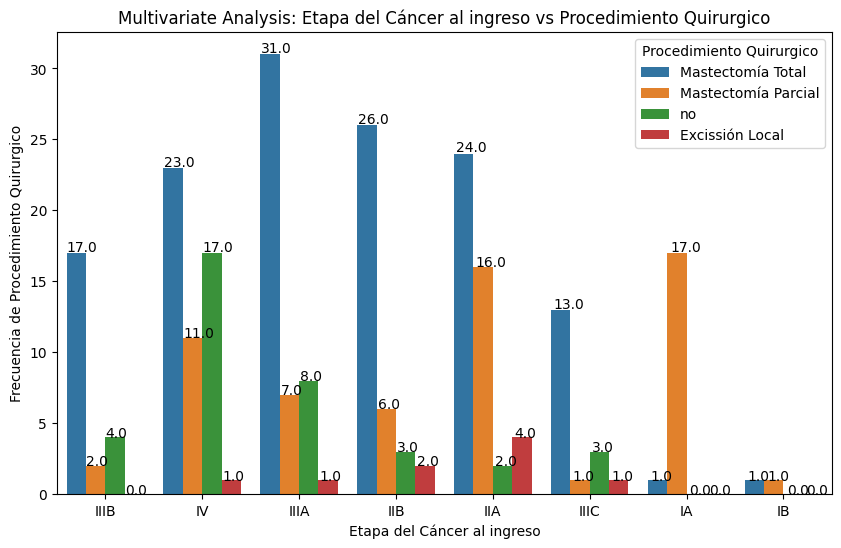

In [88]:
multivariate_analysis(df, "Etapa del Cáncer al ingreso", "Procedimiento Quirurgico")

#### Etapa del Cáncer al ingreso vs. Radioterapia:

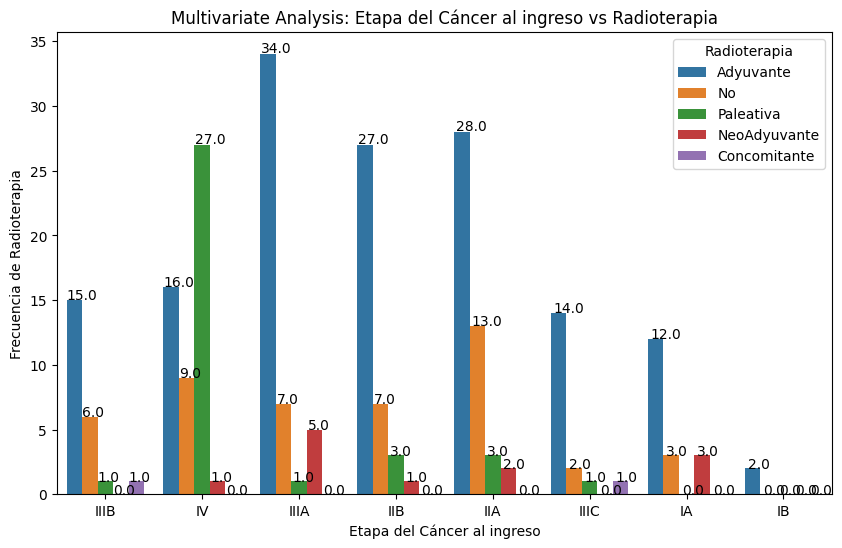

In [89]:
multivariate_analysis(df, "Etapa del Cáncer al ingreso", "Radioterapia")

#### Etapa del Cáncer al ingreso vs. Quimioterapia:

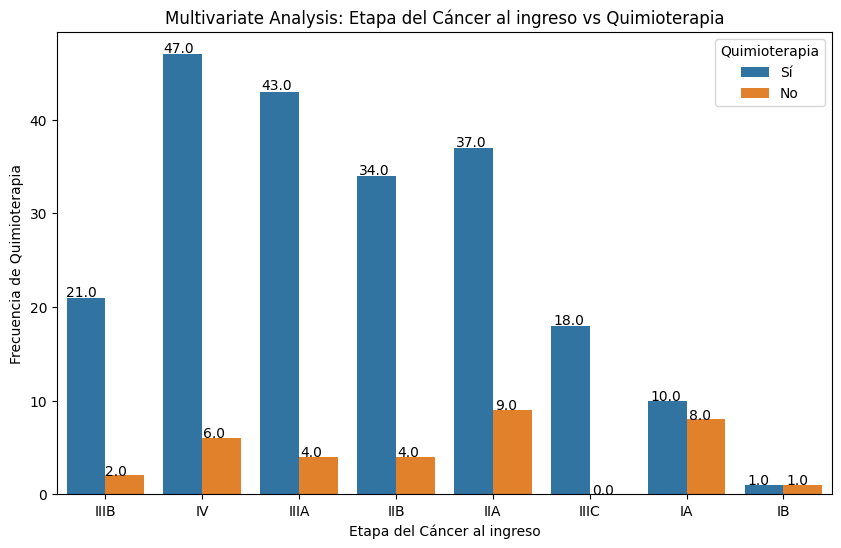

In [90]:
multivariate_analysis(df, "Etapa del Cáncer al ingreso", "Quimioterapia")

#### Etapa del Cáncer al ingreso vs. Hormonoterapia:

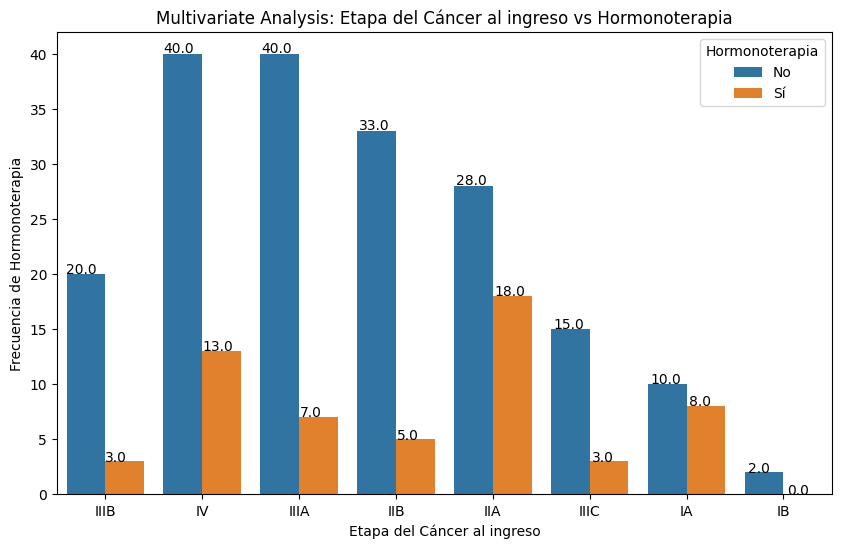

In [91]:
multivariate_analysis(df, "Etapa del Cáncer al ingreso", "Hormonoterapia")

### Analisis de tipo histologico:

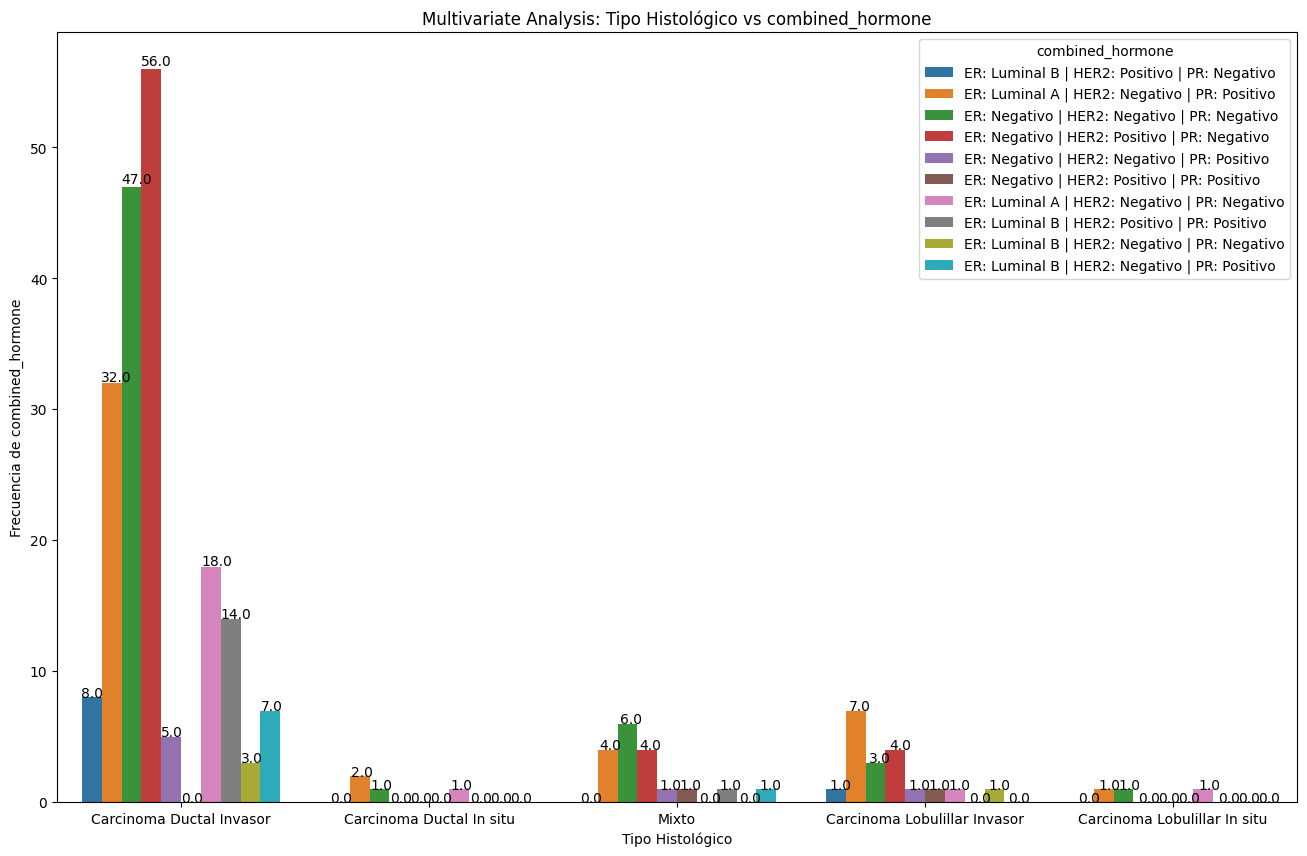

In [92]:
# Creating the top 5 histological types:
top_5_tipos = df['Tipo Histológico'].value_counts().head(5).index
df_hist_5 = df[df['Tipo Histológico'].isin(top_5_tipos)]

multivariate_analysis(df_hist_5, "Tipo Histológico", "combined_hormone", figsize=(16, 10))

#### Tipo Histológico vs. Metástasis:

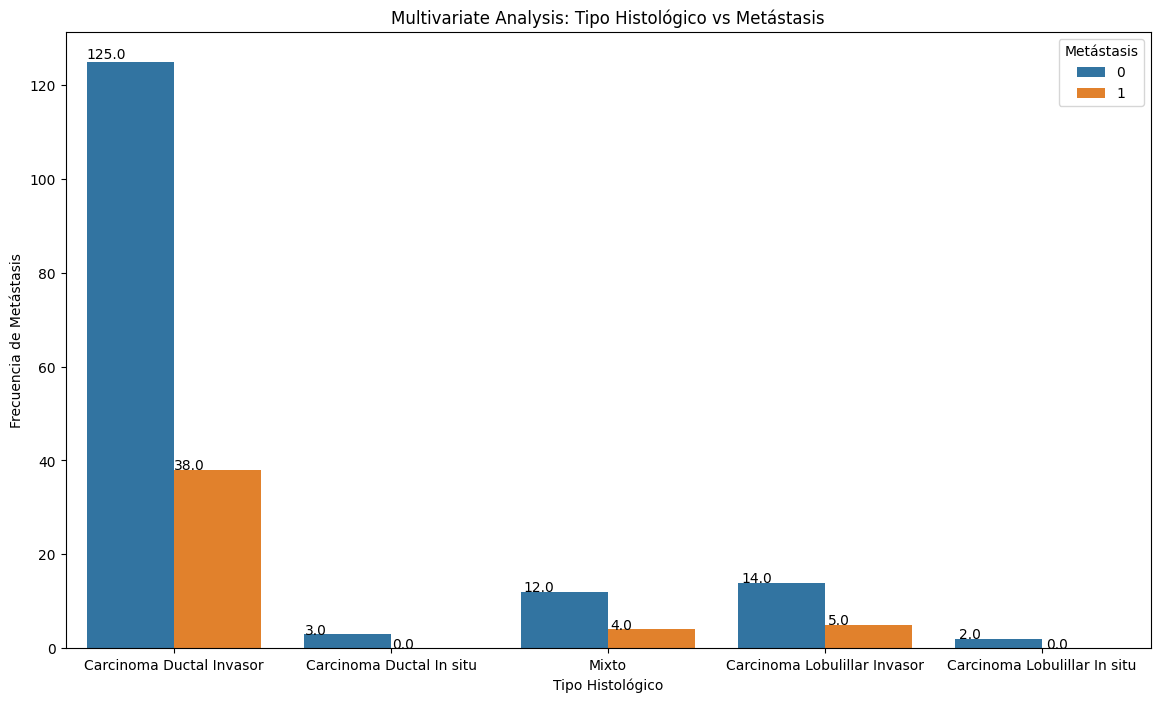

In [93]:
multivariate_analysis(df_hist_5, "Tipo Histológico", "Metástasis", figsize=(14, 8))

#### Tipo Histológico vs. Número de sitios de Metástasis:

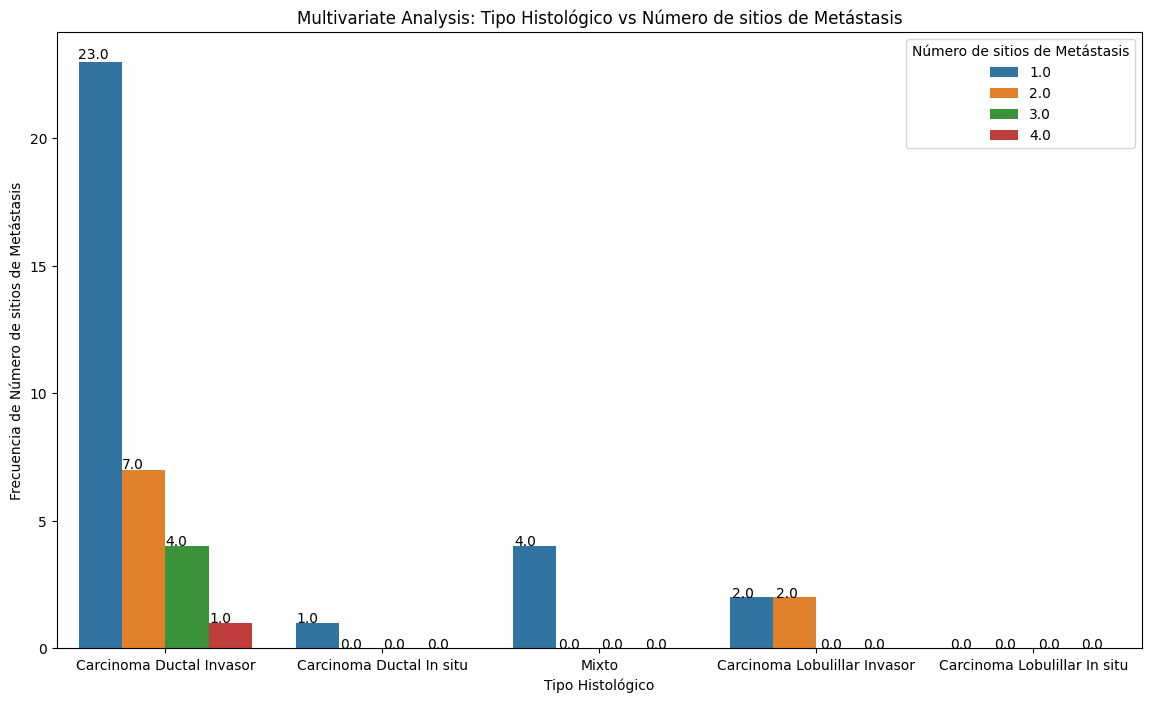

In [94]:
multivariate_analysis(df_hist_5, "Tipo Histológico", "Número de sitios de Metástasis", figsize=(14, 8))

#### Chi-Cuadrado

El test de chi-cuadrado de contingencia es una prueba estadística utilizada para determinar si existe una asociación significativa entre dos variables categóricas. Su objetivo es evaluar si las diferencias observadas entre las frecuencias observadas en una tabla de contingencia podrían haber ocurrido simplemente por azar o si hay una relación genuina entre las variables.

In [95]:
# Define the variables to test for association with 5y_survival
variables = ['Tipo Histológico', 
             'Estrogeno Recepetor', 
             'Receptor Progesterona', 
             'Her2', 
             'Etapa del Cáncer al ingreso', 
             'Procedimiento Quirurgico', 
             'Radioterapia', 
             'Quimioterapia', 
             'Hormonoterapia']

# Perform the chi-squared test for each variable
for variable in variables:
    contingency_table = pd.crosstab(df['5y_survival'], df[variable])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Variable: {variable}")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("")



Variable: Tipo Histológico
Chi-squared statistic: 15.357298730461315
P-value: 0.35417458790015555

Variable: Estrogeno Recepetor
Chi-squared statistic: 17.450508120999512
P-value: 0.00016243151998371761

Variable: Receptor Progesterona
Chi-squared statistic: 12.371013578987675
P-value: 0.00043605082236570104

Variable: Her2
Chi-squared statistic: 12.463157907104211
P-value: 0.00041505764053207707

Variable: Etapa del Cáncer al ingreso
Chi-squared statistic: 66.71346369084694
P-value: 6.799934375187117e-12

Variable: Procedimiento Quirurgico
Chi-squared statistic: 44.86330054337629
P-value: 9.892805130544382e-10

Variable: Radioterapia
Chi-squared statistic: 24.086236297933233
P-value: 7.675765023005045e-05

Variable: Quimioterapia
Chi-squared statistic: 2.815292146769231
P-value: 0.09336989619737242

Variable: Hormonoterapia
Chi-squared statistic: 6.427459117152463
P-value: 0.01123692178471393



**Tipo Histológico**:
- Interpretación: No hay suficiente evidencia para rechazar la hipótesis nula de que no hay asociación entre el tipo histológico y la supervivencia a los 5 años.


**Receptor de Estrógeno**:
- Interpretación: Hay evidencia significativa para rechazar la hipótesis nula. Existe una asociación significativa entre el receptor de estrógeno y la supervivencia a los 5 años.


**Receptor de Progesterona**:
- Interpretación: Hay evidencia significativa para rechazar la hipótesis nula. Existe una asociación significativa entre el receptor de progesterona y la supervivencia a los 5 años.


**Her2**:
- Interpretación: Hay evidencia significativa para rechazar la hipótesis nula. Existe una asociación significativa entre Her2 y la supervivencia a los 5 años.


**Etapa del Cáncer al ingreso**:
- Interpretación: Hay evidencia altamente significativa para rechazar la hipótesis nula. Existe una fuerte asociación entre la etapa del cáncer al ingreso y la supervivencia a los 5 años.


**Procedimiento Quirúrgico**:
- Interpretación: Hay evidencia altamente significativa para rechazar la hipótesis nula. Existe una fuerte asociación entre el procedimiento quirúrgico y la supervivencia a los 5 años.


**Radioterapia (Radioterapia)**:
- Interpretación: Hay evidencia altamente significativa para rechazar la hipótesis nula. Existe una asociación significativa entre la radioterapia y la supervivencia a los 5 años.


**Quimioterapia**:
- No hay suficiente evidencia para rechazar la hipótesis nula. No se encuentra una asociación significativa entre la quimioterapia y la supervivencia a los 5 años.


**Hormonoterapia**:
- Interpretación: Hay evidencia significativa para rechazar la hipótesis nula. Existe una asociación significativa entre la hormonoterapia y la supervivencia a los 5 años.

#### Cramer's V:

El test de Cramer's V es una medida estadística utilizada para evaluar la asociación entre dos variables categóricas. Es especialmente útil cuando se quiere determinar si existe una relación significativa entre estas variables. Cramer's V es una estadística que varía entre 0 y 1, donde valores más altos indican una asociación más fuerte entre las variables y valores cercanos a 0 indican una asociación más débil.

Para calcular Cramer's V, primero se construye una tabla de contingencia que muestra la frecuencia de ocurrencia de cada combinación de categorías para ambas variables. Luego, se calcula el estadístico de chi-cuadrado a partir de esta tabla. Finalmente, el valor de Cramer's V se obtiene dividiendo la raíz cuadrada del estadístico de chi-cuadrado entre la raíz cuadrada del número total de observaciones y el mínimo entre el número de filas y columnas menos uno.

In [96]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return print("Cramer's V Statstic: " + str(np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))))

for variable in variables:
    print(f'Variable: {variable}')
    cramers_v(df['5y_survival'], df[variable])
    print("")

Variable: Tipo Histológico
Cramer's V Statstic: 0.07299066625318143

Variable: Estrogeno Recepetor
Cramer's V Statstic: 0.25157349724363315

Variable: Receptor Progesterona
Cramer's V Statstic: 0.2158390618050248

Variable: Her2
Cramer's V Statstic: 0.21671213079347118

Variable: Etapa del Cáncer al ingreso
Cramer's V Statstic: 0.4945845154865278

Variable: Procedimiento Quirurgico
Cramer's V Statstic: 0.41586124155763315

Variable: Radioterapia
Cramer's V Statstic: 0.2868010389160651

Variable: Quimioterapia
Cramer's V Statstic: 0.08615712410839814

Variable: Hormonoterapia
Cramer's V Statstic: 0.14908810042332038



**Tipo Histológico**:
- **Asociación débil**: El tipo de cáncer histológico tiene una asociación débil con la supervivencia a los 5 años para el cáncer de mama. Esto sugiere que aunque podría haber cierta influencia del tipo histológico en la supervivencia, no es un predictor fuerte.


**Receptor de Estrógeno**:
- **Asociación moderada**: El estado de los receptores de estrógeno tiene una asociación moderada con la supervivencia a los 5 años para el cáncer de mama. Las pacientes con ciertos estados de receptores de estrógeno pueden tener diferentes resultados de supervivencia.


**Receptor de Progesterona**:
- **Asociación moderada**: El estado de los receptores de progesterona también tiene una asociación moderada con la supervivencia a los 5 años. Esto indica que el estado del receptor de progesterona puede influir en los resultados de supervivencia.


**Her2**:
- **Asociación moderada**: El estado de Her2 tiene una asociación moderada con la supervivencia a los 5 años. Esto sugiere que el estado de Her2 del tumor podría influir en las tasas de supervivencia.


**Etapa del Cáncer al ingreso**:
- **Asociación fuerte**: El estadio del cáncer al ingreso tiene una asociación fuerte con la supervivencia a los 5 años. Este es un hallazgo esperado, ya que el estadio del cáncer es un factor pronóstico bien establecido para la supervivencia en el cáncer de mama.


**Procedimiento Quirúrgico**:
- **Asociación fuerte**: El tipo de procedimiento quirúrgico realizado tiene una asociación fuerte con la supervivencia a los 5 años. Esto indica que la elección de la intervención quirúrgica podría influir significativamente en los resultados de supervivencia.


**Radioterapia (Radioterapia)**:
- **Asociación moderada**: El uso de radioterapia tiene una asociación moderada con la supervivencia a los 5 años. Esto sugiere que la radioterapia podría contribuir a mejorar las tasas de supervivencia para ciertos pacientes.


**Quimioterapia**:
- **Asociación débil**: La quimioterapia tiene una asociación débil con la supervivencia a los 5 años. Esto puede implicar que aunque la quimioterapia es un tratamiento común para el cáncer de mama, su impacto en la supervivencia a largo plazo podría variar entre pacientes.


**Hormonoterapia**:
- **Asociación débil a moderada**: La hormonoterapia tiene una asociación débil a moderada con la supervivencia a los 5 años. Esto indica que aunque la hormonoterapia podría influir en los resultados de supervivencia, su efecto puede no ser tan fuerte como otros factores como el estadio del cáncer o la intervención quirúrgica.

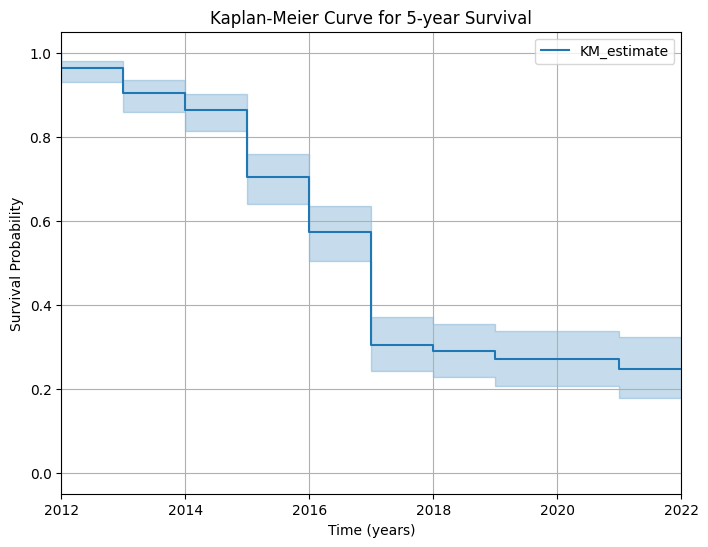

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


# Encoding 5y_survival
df['5y_survival'] = df['5y_survival'].map({'Sí': 1, 'No': 0})
df['5y'] = df['Año del Caso'] + 5
df['5y']

# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(df['Año del Caso'], event_observed=df['5y_survival'])

# Plot Kaplan-Meier curve
plt.figure(figsize=(8, 6))
kmf.plot()
plt.title('Kaplan-Meier Curve for 5-year Survival')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.xlim(2012, 2022)
plt.grid(True)
plt.show()

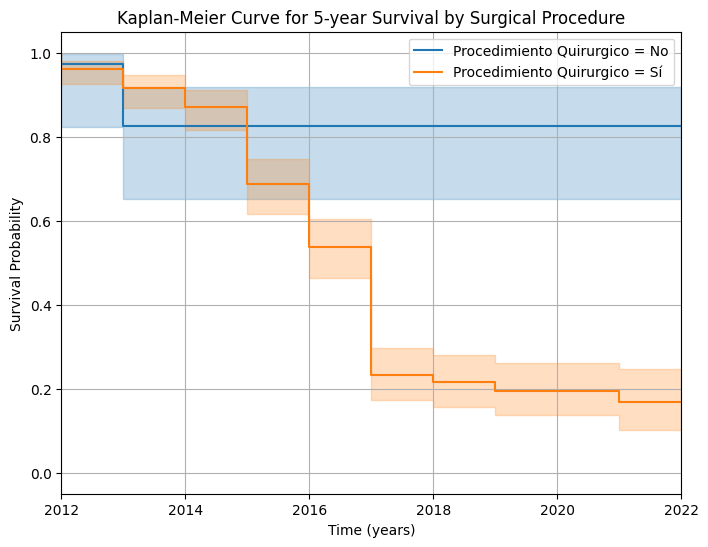

In [98]:

# Fit Kaplan-Meier estimator for 'Procedimiento Quirurgico' == 'No'
kmf_no_surgery = KaplanMeierFitter()
kmf_no_surgery.fit(df.loc[df['Procedimiento Quirurgico'] == 'no', 'Año del Caso'], event_observed=df.loc[df['Procedimiento Quirurgico'] == 'no', '5y_survival'])

# Fit Kaplan-Meier estimator for 'Procedimiento Quirurgico' == 'Sí'
kmf_surgery = KaplanMeierFitter()
kmf_surgery.fit(df.loc[df['Procedimiento Quirurgico'] != 'no', 'Año del Caso'], event_observed=df.loc[df['Procedimiento Quirurgico'] != 'no', '5y_survival'])

# Plot Kaplan-Meier curves
plt.figure(figsize=(8, 6))

# Plot Kaplan-Meier curve for 'Procedimiento Quirurgico' == 'No'
kmf_no_surgery.plot(label='Procedimiento Quirurgico = No')

# Plot Kaplan-Meier curve for 'Procedimiento Quirurgico' == 'Sí'
kmf_surgery.plot(label='Procedimiento Quirurgico = Sí')

plt.title('Kaplan-Meier Curve for 5-year Survival by Surgical Procedure')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.xlim(2012, 2022)
plt.grid(True)
plt.legend()
plt.show()

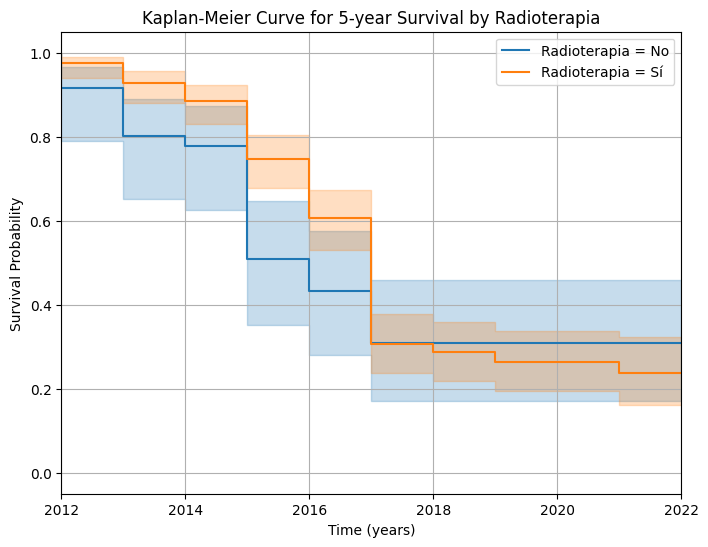

In [99]:
# Fit Kaplan-Meier estimator for 'Procedimiento Quirurgico' == 'No'
kmf_no_rad = KaplanMeierFitter()
kmf_no_rad.fit(df.loc[df['Radioterapia'] == 'No', 'Año del Caso'], event_observed=df.loc[df['Radioterapia'] == 'No', '5y_survival'])

# Fit Kaplan-Meier estimator for 'Procedimiento Quirurgico' == 'Sí'
kmf_rad = KaplanMeierFitter()
kmf_rad.fit(df.loc[df['Radioterapia'] != 'No', 'Año del Caso'], event_observed=df.loc[df['Radioterapia'] != 'No', '5y_survival'])

# Plot Kaplan-Meier curves
plt.figure(figsize=(8, 6))

# Plot Kaplan-Meier curve for 'Procedimiento Quirurgico' == 'No'
kmf_no_rad.plot(label='Radioterapia = No')

# Plot Kaplan-Meier curve for 'Procedimiento Quirurgico' == 'Sí'
kmf_rad.plot(label='Radioterapia = Sí')

plt.title('Kaplan-Meier Curve for 5-year Survival by Radioterapia')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.xlim(2012, 2022)
plt.grid(True)
plt.legend()
plt.show()

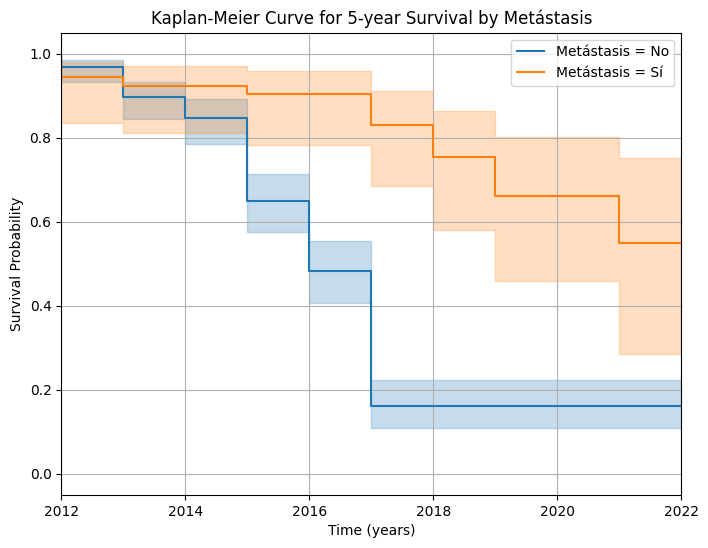

In [100]:
# Fit Kaplan-Meier estimator for 'Procedimiento Quirurgico' == 'No'
kmf_mets = KaplanMeierFitter()
kmf_mets.fit(df.loc[df['Etapa del Cáncer al ingreso'] == 'IV', 'Año del Caso'], event_observed=df.loc[df['Etapa del Cáncer al ingreso'] == 'IV', '5y_survival'])

# Fit Kaplan-Meier estimator for 'Procedimiento Quirurgico' == 'Sí'
kmf_no_mets = KaplanMeierFitter()
kmf_no_mets.fit(df.loc[df['Etapa del Cáncer al ingreso'] != 'IV', 'Año del Caso'], event_observed=df.loc[df['Etapa del Cáncer al ingreso'] != 'IV', '5y_survival'])

# Plot Kaplan-Meier curves
plt.figure(figsize=(8, 6))

# Plot Kaplan-Meier curve for 'Procedimiento Quirurgico' == 'No'
kmf_no_mets.plot(label='Metástasis = No')

# Plot Kaplan-Meier curve for 'Procedimiento Quirurgico' == 'Sí'
kmf_mets.plot(label='Metástasis = Sí')

plt.title('Kaplan-Meier Curve for 5-year Survival by Metástasis')
plt.xlabel('Time (years)')
plt.ylabel('Survival Probability')
plt.xlim(2012, 2022)
plt.grid(True)
plt.legend()
plt.show()